In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
import random
import seaborn as sns
import matplotlib as mpl

from scipy import stats
from sklearn.metrics.pairwise import cosine_similarity as cs
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

In [4]:
df_users = pd.read_csv('/gdrive/My Drive/Colab Notebooks/SSAFY/users.csv')  # Ïú†Ï†Ä Îç∞Ïù¥ÌÑ∞
df_problems = pd.read_csv('/gdrive/My Drive/Colab Notebooks/SSAFY/problems.csv')  # Î¨∏Ï†ú Îç∞Ïù¥ÌÑ∞
df_problems_solved = pd.read_csv('/gdrive/My Drive/Colab Notebooks/SSAFY/user_solved_problems_fixed.csv')  # Ïú†Ï†ÄÎ≥Ñ Ìëº Î¨∏Ï†ú Îç∞Ïù¥ÌÑ∞
df_records_solved = pd.read_csv('/gdrive/My Drive/Colab Notebooks/SSAFY/user_lately_solved_problems2.csv')  # Ïú†Ï†ÄÎ≥Ñ ÏµúÍ∑º 60Í∞úÏùò 'ÎßûÌòîÏäµÎãàÎã§' Îç∞Ïù¥ÌÑ∞

In [5]:
display(df_users)

handle  solved_count  user_class  tier  rating  \
0                  koosaga         11522          10    31    3264   
1                 cki86201          6088          10    31    3225   
2      mitnegativeinfinity          2267          10    31    3176   
3                    ainta          4172          10    31    3156   
4                   yclock          2730          10    31    3126   
...                    ...           ...         ...   ...     ...   
89795            yooui0204             0           0     0       0   
89796           yooveloper             0           0     0       0   
89797              youhk43             0           0     0       0   
89798            youjong12             0           0     0       0   
89799          youngho7482             0           0     0       0   

       rating_by_problems_sum  rating_by_class  rating_by_solved_count  \
0                        2814              250                     175   
1                        2775              250                     175   
2                        2726              250                     175   
3                        2706              250                     175   
4                        2676              250                     175   
...                       ...              ...                     ...   
89795                       0                0                       0   
89796                       0                0                       0   
89797                       0                0                       0   
89798                       0                0                       0   
89799                       0                0                       0   

               exp  rival_count  reverse_rival_count  max_streak    rank  \
0      15362924779            5                  122          24       1   
1      10013721021            0                   30           3       2   
2       6416744374            0                   12           8       3   
3       7428922337            0                   14           2       4   
4       4336235487            4                   16           6       5   
...            ...          ...                  ...         ...     ...   
89795            0            0                    0           0  166946   
89796            0            0                    0           0  166947   
89797            0            0                    0           0  166948   
89798            0            0                    0           0  166949   
89799            0            0                    0           0  166950   

       organization  
0             394.0  
1             299.0  
2             440.0  
3             299.0  
4             299.0  
...             ...  
89795           NaN  
89796           NaN  
89797           NaN  
89798           NaN  
89799           NaN  

[89800 rows x 14 columns]

In [6]:
display(df_problems)

problemId  titleKo  isSolvable  acceptedUserCount  level  averageTries  \
0           1000      A+B        True             199179      1             2   
1           1001      A-B        True             168110      1             1   
2           1002       ÌÑ∞Î†õ        True              28569      8             4   
3           1003  ÌîºÎ≥¥ÎÇòÏπò Ìï®Ïàò        True              37972      8             3   
4           1004    Ïñ¥Î¶∞ ÏôïÏûê        True              10649      8             2   
...          ...      ...         ...                ...    ...           ...   
23477      25565  Îî∏Í∏∞ÏôÄ ÌÜ†ÎßàÌÜ†        True                 64     11             2   
23478      25566       ÍπÄÎ∞•        True                 36     17             1   
23479      25567    Ï§Ñ ÏÑ∏Ïö∞Í∏∞        True                 32     18             2   
23480      25568     ÌîºÎùºÎØ∏Îìú        True                 25     15             1   
23481      25569  MyÎ∑∞ Íæ∏ÎØ∏Í∏∞        True                 44     17             1   

                                                    tags  
0                         implementation,arithmetic,math  
1                         implementation,arithmetic,math  
2                                          geometry,math  
3                                                     dp  
4                                               geometry  
...                                                  ...  
23477                           case_work,implementation  
23478  coordinate_compression,data_structures,segtree...  
23479  data_structures,deque,disjoint_set,linked_list...  
23480                                      ad_hoc,greedy  
23481  combinatorics,exponentiation_by_squaring,flt,m...  

[23482 rows x 7 columns]

In [7]:
df_problems[df_problems.averageTries == 7340]

Empty DataFrame
Columns: [problemId, titleKo, isSolvable, acceptedUserCount, level, averageTries, tags]
Index: []

In [8]:
df_problems[~df_problems.tags.isnull()]

problemId  titleKo  isSolvable  acceptedUserCount  level  averageTries  \
0           1000      A+B        True             199179      1             2   
1           1001      A-B        True             168110      1             1   
2           1002       ÌÑ∞Î†õ        True              28569      8             4   
3           1003  ÌîºÎ≥¥ÎÇòÏπò Ìï®Ïàò        True              37972      8             3   
4           1004    Ïñ¥Î¶∞ ÏôïÏûê        True              10649      8             2   
...          ...      ...         ...                ...    ...           ...   
23477      25565  Îî∏Í∏∞ÏôÄ ÌÜ†ÎßàÌÜ†        True                 64     11             2   
23478      25566       ÍπÄÎ∞•        True                 36     17             1   
23479      25567    Ï§Ñ ÏÑ∏Ïö∞Í∏∞        True                 32     18             2   
23480      25568     ÌîºÎùºÎØ∏Îìú        True                 25     15             1   
23481      25569  MyÎ∑∞ Íæ∏ÎØ∏Í∏∞        True                 44     17             1   

                                                    tags  
0                         implementation,arithmetic,math  
1                         implementation,arithmetic,math  
2                                          geometry,math  
3                                                     dp  
4                                               geometry  
...                                                  ...  
23477                           case_work,implementation  
23478  coordinate_compression,data_structures,segtree...  
23479  data_structures,deque,disjoint_set,linked_list...  
23480                                      ad_hoc,greedy  
23481  combinatorics,exponentiation_by_squaring,flt,m...  

[16368 rows x 7 columns]

In [9]:
display(df_problems_solved)

id               handle  \
0      89800          youngho7482   
1      89799            youjong12   
2      89798              youhk43   
3      89797           yooveloper   
4      89796            yooui0204   
...      ...                  ...   
89795      5               yclock   
89796      4                ainta   
89797      3  mitnegativeinfinity   
89798      2             cki86201   
89799      1              koosaga   

                                                problems  
0                            1000,2557,10171,10172,10718  
1                                                    NaN  
2                                                    NaN  
3                                                    NaN  
4                                                    NaN  
...                                                  ...  
89795  1000,1001,1002,1003,1004,1005,1007,1008,1009,1...  
89796  1000,1001,1002,1003,1004,1005,1007,1008,1009,1...  
89797  1000,1001,1019,1056,1067,1144,1150,1311,1372,1...  
89798  1000,1001,1002,1003,1004,1005,1006,1007,1008,1...  
89799  1000,1001,1002,1003,1004,1005,1006,1007,1008,1...  

[89800 rows x 3 columns]

In [10]:
# NA Í∞íÏù¥ ÏûàÎäîÏßÄ ÌôïÏù∏
df_problems.isna().sum(axis=0)/22988

problemId            0.000000
titleKo              0.000044
isSolvable           0.000000
acceptedUserCount    0.000000
level                0.000000
averageTries         0.000000
tags                 0.309466
dtype: float64

ÌÉúÍ∑∏Ïóê NA Í∞íÏù¥ Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏïΩ 31% Ï°¥Ïû¨Ìï®. => prepocessing needed

In [11]:
df_problems[df_problems.tags.isna()==1]

problemId            titleKo  isSolvable  acceptedUserCount  level  \
172         1172  ÏÑ†Ïù∏Ïû• Automorphisms        True                  6     24   
190         1190             Í≥® ÏÑ∏Î†àÎ™®Îãà        True                  3     23   
222         1223              ÎßàÎ≤ïÏùò Îèå        True                  2      0   
236         1237               Ï†ï„ÖãÎ≤Ö„Öã        True              15169      0   
273         1274               Ïª§ÌîºÏàç1        True                 15      0   
...          ...                ...         ...                ...    ...   
23462      25535             IZAZOV        True                  0      0   
23463      25536          SKLONI≈†TE        True                  0      0   
23466      25539             ≈†IBICE        True                  0      0   
23467      25540              SMRAD        True                  0      0   
23468      25541             KRAFNA        True                  0      0   

       averageTries tags  
172               3  NaN  
190               9  NaN  
222               8  NaN  
236               3  NaN  
273              16  NaN  
...             ...  ...  
23462             0  NaN  
23463             0  NaN  
23466             0  NaN  
23467             0  NaN  
23468             0  NaN  

[7114 rows x 7 columns]

In [12]:
# Î¨∏Ï†ú Îç∞Ïù¥ÌÑ∞Ïùò ÌÜµÍ≥Ñ
df_problems.describe()

problemId  acceptedUserCount         level  averageTries
count  23482.000000       23482.000000  23482.000000  23482.000000
mean   13422.096414         665.008049     10.020910      2.189507
std     7093.371458        5393.124305      8.181059     44.794318
min     1000.000000           0.000000      0.000000      0.000000
25%     7443.250000           3.000000      0.000000      1.000000
50%    13588.500000          13.000000     10.000000      1.000000
75%    19536.750000          67.000000     17.000000      2.000000
max    25569.000000      224839.000000     30.000000   6847.000000

averageTriesÏùò maxÍ∞íÏù¥ 6,847Ïù∏ Îç∞Ïù¥ÌÑ∞Îäî ÌôïÏù∏Ïù¥ ÌïÑÏöîÌï¥Î≥¥ÏûÑ.

In [13]:
# Î¨∏Ï†ú Îç∞Ïù¥ÌÑ∞Ïùò Í∞Å Ïª¨ÎüºÏùò Í≥†Ïú†Í∞í Í∞úÏàò Íµ¨ÌïòÍ∏∞
print('problemId Í≥†Ïú†Í∞í:', df_problems.problemId.nunique())
print('level Í≥†Ïú†Í∞í:', df_problems.level.nunique())
print('titleKo Í≥†Ïú†Í∞í:', df_problems.titleKo.nunique())
print('tags Í≥†Ïú†Í∞í: ', len(set(sum(df_problems.tags.apply(lambda x: str(x).split(',')).to_list(),[]))))

problemId Í≥†Ïú†Í∞í: 23482
level Í≥†Ïú†Í∞í: 31
titleKo Í≥†Ïú†Í∞í: 21574
tags Í≥†Ïú†Í∞í:  192


Text(0.5, 1.0, 'zoom to mean')

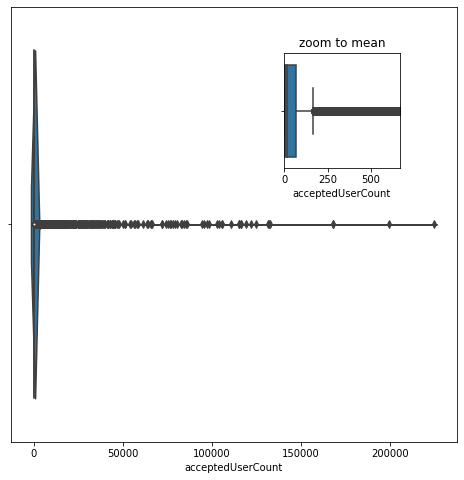

In [14]:
# Î¨∏Ï†ú Îç∞Ïù¥ÌÑ∞Ïùò Ïó∞ÏÜçÌòï Î≥ÄÏàò Ïª¨Îüº ÌôïÏù∏
# - accepted_user_count
fig, ax= plt.subplots(figsize=[8,8])
ax= sns.boxplot(df_problems.acceptedUserCount)
ax= sns.violinplot(df_problems.acceptedUserCount)

ax2 = plt.axes([0.6, 0.6, .2, .2], facecolor='w')
ax2= sns.boxplot(df_problems.acceptedUserCount, ax=ax2)
ax2.set_xlim([0,665])
ax2.set_title('zoom to mean')

In [15]:
print(df_problems.acceptedUserCount)

0        199179
1        168110
2         28569
3         37972
4         10649
          ...  
23477        64
23478        36
23479        32
23480        25
23481        44
Name: acceptedUserCount, Length: 23482, dtype: int64


Î¨∏Ï†úÎ≥Ñ ÎßûÏùÄ ÏÇ¨Îûå ÏàòÍ∞Ä ÌèâÍ∑† Í∞íÏù∏ 665 Í∑ºÏ≤òÎ°ú Ïè†Î†§ÏûàÏùå.

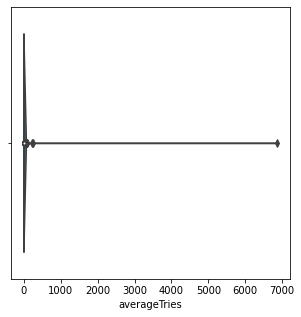

In [16]:
# avergeTries
fig, ax= plt.subplots(figsize=[5,5])
ax= sns.boxplot(df_problems.averageTries)
ax= sns.violinplot(df_problems.averageTries)

In [17]:
df_problems[df_problems.averageTries == 6847]

problemId  titleKo  isSolvable  acceptedUserCount  level  averageTries  \
9157      10944  ÎûúÎç§ Í≤åÏûÑ~~        True                 50      0          6847   

     tags  
9157  NaN

Î¨∏Ï†ú ÏãúÎèÑ ÌöüÏàòÏóêÏÑú Ïù¥Ï†ÑÏóê Î≥¥ÏïòÎçò Í≤ÉÏ≤òÎüº 6,847Ïù∏ Ïù¥ÏÉÅÏπòÍ∞Ä ÌïòÎÇò Ï°¥Ïû¨Ìï®.

Text(0.5, 1.0, 'zoom to mean')

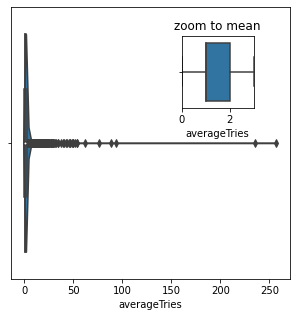

In [18]:
fig, ax= plt.subplots(figsize=[5,5])
ax= sns.boxplot(df_problems[df_problems.averageTries!=6847].averageTries)
ax= sns.violinplot(df_problems[df_problems.averageTries!=6847].averageTries)

ax2 = plt.axes([0.6, 0.6, .2, .2], facecolor='w')
ax2= sns.boxplot(df_problems[df_problems.averageTries!=6847].averageTries, ax=ax2)
ax2.set_xlim([0,3])
ax2.set_title('zoom to mean')

Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞ÌñàÏùÑ Îïå, ÌèâÍ∑†Í∞íÏù∏ 2Ïóê ÌèâÍ∑† ÏãúÎèÑ ÌöüÏàòÍ∞Ä Î™∞Î†§ÏûàÏùå.

averageTriesÍ∞Ä 6847Ïù∏ Îç∞Ïù¥ÌÑ∞Îäî Ï†úÏô∏ÌïòÎäîÍ≤å Ï¢ãÏùÑ Í≤ÉÏúºÎ°ú Î≥¥ÏûÑ.

In [19]:
print('Ï†úÍ±∞ Ï†Ñ:', len(df_problems))
df_problems.drop(df_problems[df_problems.averageTries == 6847].index, axis=0, inplace=True)
print('Ï†úÍ±∞ ÌõÑ:', len(df_problems))

Ï†úÍ±∞ Ï†Ñ: 23482
Ï†úÍ±∞ ÌõÑ: 23481


In [20]:
# Ïú†Ï†ÄÍ∞Ä ÎßûÌûå Î¨∏Ï†ú ÏàòÎ•º Î∂ÑÏÑù

In [21]:
def num(x):
    return len(str(x).split(','))

In [22]:
df_problems_solved['num']= df_problems_solved.problems.apply(num)
df_problems_solved[['id', 'num']]

id   num
0      89800     5
1      89799     1
2      89798     1
3      89797     1
4      89796     1
...      ...   ...
89795      5  2753
89796      4  4207
89797      3  2269
89798      2  5867
89799      1  6094

[89800 rows x 2 columns]

In [23]:
df_problems_solved.num.describe()

count    89800.000000
mean       132.051058
std        206.767317
min          1.000000
25%         31.000000
50%         74.000000
75%        166.000000
max       6199.000000
Name: num, dtype: float64

Ïú†Ï†ÄÍ∞Ä Ìëº Î¨∏Ï†ú ÏàòÏùò ÌèâÍ∑†ÏùÄ 133Í∞úÏûÖÎãàÎã§.

Text(0.5, 1.0, 'zoom to mean')

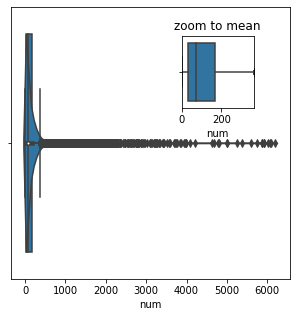

In [24]:
fig, ax= plt.subplots(figsize=[5,5])
ax= sns.boxplot(df_problems_solved.num)
ax= sns.violinplot(df_problems_solved.num)

ax2 = plt.axes([0.6, 0.6, .2, .2], facecolor='w')
ax2= sns.boxplot(df_problems_solved.num, ax=ax2)
ax2.set_xlim([0,363])
ax2.set_title('zoom to mean')

Ïú†Ï†ÄÏùò Î¨∏Ï†ú ÌíÄÏù¥ ÏàòÎäî ÌèâÍ∑†Ïù∏ 133Í∞úÏóê Î™∞Î†§ÏûàÎÑ§Ïöî.

In [25]:
# Í∞ÄÏû• Î¨∏Ï†úÎ•º ÎßéÏù¥ Ìëº Ïú†Ï†ÄÎäî?

In [26]:
df_problems_solved[df_problems_solved.num== 11226]

Empty DataFrame
Columns: [id, handle, problems, num]
Index: []

usersÏóê Í∏∞Î°ùÎêú koosagaÏùò solved_countÏù∏ 11075ÏôÄ Í∞íÏù¥ Îã§Î•¥ÎÑ§Ïöî. üòÆ
  
Ïù¥Îäî BOJÏôÄ solved.acÏóêÏÑú ÏßëÍ≥ÑÌïòÎäî Î¨∏Ï†ú ÏàòÏùò Ï∞®Ïù¥, Î∂ÄÎ∂Ñ Ï†êÏàòÍ∞Ä Îì§Ïñ¥Í∞ÄÎäî 100% ÎßûÏßÄ Î™ªÌïú Î¨∏Ï†ú Îì± Ïó¨Îü¨ ÏöîÏù∏ÏúºÎ°ú Ïù∏Ìïú Í≤ÉÏúºÎ°ú Î≥¥ÏûÖÎãàÎã§.

In [27]:
# Ïú†Ï†Ä Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Î¨∏Ï†úÎ•º ÌïòÎÇòÎèÑ ÌíÄÏßÄ ÏïäÏùÄ ÏÇ¨ÎûåÏùò ÏàòÎäî Î™á Î™Ö?
print("Î¨∏Ï†úÎ•º Ìïú Î≤àÎèÑ Ïïà Ìëº ÏÇ¨ÎûåÏùò Ïàò :", len(df_users.loc[df_users['solved_count'] == 0]))

Î¨∏Ï†úÎ•º Ìïú Î≤àÎèÑ Ïïà Ìëº ÏÇ¨ÎûåÏùò Ïàò : 1510


In [28]:
print(len(df_users))

89800


ÏïΩ 2%(1.6815)Ïùò Ïú†Ï†ÄÍ∞Ä Î¨∏Ï†úÎ•º ÌïòÎÇòÎèÑ ÌíÄÏßÄ ÏïäÏïòÏùåÏùÑ Ïïå Ïàò ÏûàÏùå.

In [29]:
# Î¨∏Ï†úÏùò ÏïåÍ≥†Î¶¨Ï¶òÏùÑ Î∂ÑÎ•òÌïòÎäî ÌÉúÍ∑∏Ïùò Ï¢ÖÎ•ò Ïàò Íµ¨ÌïòÍ∏∞
set_tags = set()
for tags in df_problems['tags'].dropna().values:
    for tag in tags.split(','):
        set_tags.add(tag)

In [30]:
print("tagÏùò Ï¢ÖÎ•ò Ïàò :", len(set_tags))

tagÏùò Ï¢ÖÎ•ò Ïàò : 191


Ï¥ù 191Í∞úÏùò ÌÉúÍ∑∏Í∞Ä Ï°¥Ïû¨ÌïúÎã§Îäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏùå.

In [31]:
# Î¨∏Ï†úÏùò IDÎ≥ÑÎ°ú Ï†úÎ™©, ÌíÄÎ¶∞ ÌöüÏàò Í∑∏Î¶¨Í≥† Î†àÎ≤®(Ìã∞Ïñ¥)ÏùÑ Îπ†Î•¥Í≤å ÏùΩÏùÑ Ïàò ÏûàÎèÑÎ°ù dictionary ÌòïÌÉúÎ°ú Ï†ÄÏû•ÌïòÍ∏∞
id2title = dict() # Î¨∏Ï†ú idÏôÄ titleÏùÑ ÎîïÏÖîÎÑàÎ¶¨Î°ú Ï†ÄÏû•
id2count = dict() # Î¨∏Ï†ú idÎ≥ÑÎ°ú ÌíÄÎ¶∞ ÌöüÏàòÎ•º ÏÑ∏Í∏∞ ÏúÑÌïú ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ±
id2level = dict() # Î¨∏Ï†ú idÎ≥ÑÎ°ú Î†àÎ≤® ÎîïÏÖîÎÑàÎ¶¨
for i in tqdm(range(len(df_problems))):
    id2title[df_problems.iloc[i, 1]] = df_problems.iloc[i, 2]
    id2count[df_problems.iloc[i, 1]] = 0
    id2level[df_problems.iloc[i, 1]] = df_problems.iloc[i, 6]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23481/23481 [00:04<00:00, 4942.30it/s]


In [32]:
# Ï±ÑÏ†êÏùÑ ÌóàÏö©ÌïòÏßÄ ÏïäÏïÑÏÑú ÏïÑÏòà Ï≤òÏùåÎ∂ÄÌÑ∞ ÌíÄ Ïàò ÏóÜÎäî Î¨∏Ï†úÎäî Î¨¥ÏóáÏùºÍπå?
# is_solvable == FalseÏù∏ Í≤ÉÎì§ ÌôïÏù∏
non_solvable = df_problems.loc[df_problems['isSolvable'] == False]
non_solvable

problemId         titleKo  isSolvable  acceptedUserCount  level  \
378         1381      ÏöîÍµ¨Î•¥Ìä∏Ïùò Ïú†ÌÜµÍ∏∞Ìïú       False                 39      0   
852         1861           Í≤ΩÎ°ú Ï∞æÍ∏∞       False                  0      0   
1030        2046           Ïù¥Ïñ¥Îã¨Î¶¨Í∏∞       False                  0      0   
1179        2199        DNA Ìï¥ÎèÖ 2       False                  0      0   
1594        2627            Ìä∏Î¶¨ÌöåÏ†Ñ       False                  0      0   
...          ...             ...         ...                ...    ...   
22031      24021         Zathras       False                  0      0   
22032      24022   Seating Chart       False                  0      0   
22143      24135    „É≠„Ç¥„Éû„Éº„ÇØ (Logo)       False                  0      0   
22700      24734   Eerie Shadows       False                  0      0   
22701      24735  Getting Square       False                  0      0   

       averageTries tags  
378               6  NaN  
852               0  NaN  
1030              0  NaN  
1179              0  NaN  
1594              0  NaN  
...             ...  ...  
22031             0  NaN  
22032             0  NaN  
22143             0  NaN  
22700             0  NaN  
22701             0  NaN  

[304 rows x 7 columns]

304Í∞úÏùò Î¨∏Ï†úÍ∞Ä ÌíÄ Ïàò ÏóÜÎäî Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ®.

In [33]:
# ÏïÑÏòà ÌíÄ Ïàò ÏóÜÎäî Î¨∏Ï†úÎäî Î∂ÑÏÑùÏóêÏÑú Ï†úÏô∏

# isSolvable == False Ïù∏ Î¨∏Ï†úÎäî Ï†úÏô∏
df_problems = df_problems.drop(index=non_solvable.index).reset_index(drop=True)
df_problems

problemId  titleKo  isSolvable  acceptedUserCount  level  averageTries  \
0           1000      A+B        True             199179      1             2   
1           1001      A-B        True             168110      1             1   
2           1002       ÌÑ∞Î†õ        True              28569      8             4   
3           1003  ÌîºÎ≥¥ÎÇòÏπò Ìï®Ïàò        True              37972      8             3   
4           1004    Ïñ¥Î¶∞ ÏôïÏûê        True              10649      8             2   
...          ...      ...         ...                ...    ...           ...   
23172      25565  Îî∏Í∏∞ÏôÄ ÌÜ†ÎßàÌÜ†        True                 64     11             2   
23173      25566       ÍπÄÎ∞•        True                 36     17             1   
23174      25567    Ï§Ñ ÏÑ∏Ïö∞Í∏∞        True                 32     18             2   
23175      25568     ÌîºÎùºÎØ∏Îìú        True                 25     15             1   
23176      25569  MyÎ∑∞ Íæ∏ÎØ∏Í∏∞        True                 44     17             1   

                                                    tags  
0                         implementation,arithmetic,math  
1                         implementation,arithmetic,math  
2                                          geometry,math  
3                                                     dp  
4                                               geometry  
...                                                  ...  
23172                           case_work,implementation  
23173  coordinate_compression,data_structures,segtree...  
23174  data_structures,deque,disjoint_set,linked_list...  
23175                                      ad_hoc,greedy  
23176  combinatorics,exponentiation_by_squaring,flt,m...  

[23177 rows x 7 columns]

In [34]:
# Î¨∏Ï†ú Î†àÎ≤®(Ìã∞Ïñ¥) Î∂ÑÏÑù

# Î¨∏Ï†ú Î†àÎ≤® Ï¢ÖÎ•ò ÌôïÏù∏ÌïòÍ∏∞
print(sorted(df_problems['level'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


0Î∂ÄÌÑ∞ 30ÍπåÏßÄÏùò Ï†ïÏàòÎ°ú Ïù¥Î£®Ïñ¥Ï†∏ ÏûàÏùå.

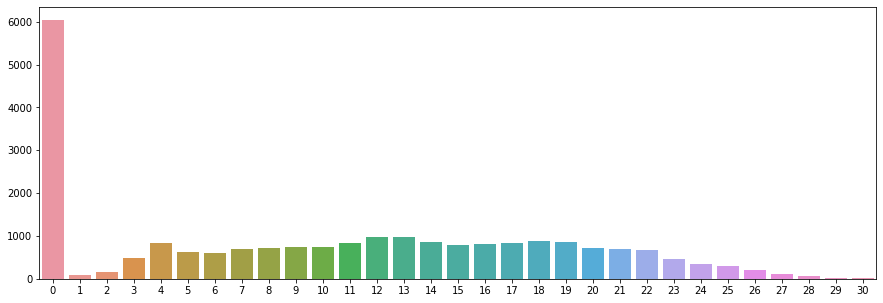

In [35]:
# Î¨∏Ï†ú Î†àÎ≤® Î∂ÑÌè¨ ÌôïÏù∏ÌïòÍ∏∞

level_cnt = df_problems['level'].value_counts().sort_index()

plt.figure(figsize=(15,5))
sns.barplot(x=level_cnt.index, y=level_cnt.values)

Î†àÎ≤®Ïù¥ 0Ïù∏ Í≤ÉÏù¥ ÎÑàÎ¨¥ ÎßéÏùå.
  
Î†àÎ≤®Ïù¥ 0Ïù∏ Î¨∏Ï†úÎäî ÎÇúÏù¥ÎèÑÍ∞Ä Îß§Í≤®ÏßÄÏßÄ ÏïäÏùÄ Î¨∏Ï†úÏù¥ÎØÄÎ°ú Ïù¥Î•º Ï†úÏô∏ÌïòÏó¨ Î∂ÑÌè¨Î•º Îã§Ïãú Í∑∏Î¶∞Îã§.

In [36]:
# levelÏù¥ 0Ïù∏ Í≤ÉÏùÑ Ï†úÏô∏Ìïú ÌõÑ Îã§Ïãú Î∂ÑÌè¨Î•º ÌôïÏù∏.
df_problems = df_problems.loc[df_problems['level'] != 0].reset_index(drop=True)

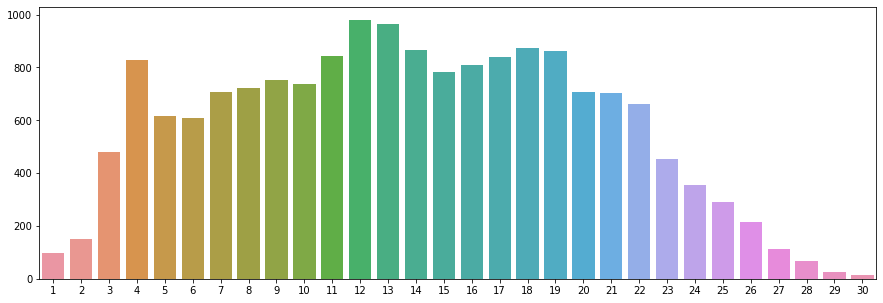

In [37]:
level_cnt = df_problems['level'].value_counts().sort_index()

plt.figure(figsize=(15,5))
sns.barplot(x=level_cnt.index, y=level_cnt.values)

ÎÇúÏù¥ÎèÑÍ∞Ä Îß§Í≤®ÏßÑ Î¨∏Ï†úÎì§ÏùÄ Ï§ëÍ∞Ñ Î∂ÄÎ∂ÑÏùò Î†àÎ≤®Ïóê ÎßéÏù¥ Î∂ÑÌëúÌï¥ÏûàÏùå.
  
Í∞ÄÏû• ÎßéÏù¥ Î∂ÑÌè¨Ìïú Î†àÎ≤®ÏùÄ Î∏åÎ°†Ï¶à 2Ïù¥Í≥†, Í∑∏ Ïô∏Ïùò Í≥®Îìú4ÏôÄ Í≥®Îìú 3ÏóêÎèÑ ÎßéÏù¥ Î∂ÑÌè¨Ìïú Í≤ÉÏùÑ Î≥º Ïàò ÏûàÏùå.
  
Ï¶â, Ï§ëÍ∞Ñ Ï†ïÎèÑÏùò ÎÇúÏù¥ÎèÑÎ•º Í∞ÄÏßÑ Î¨∏Ï†úÎì§Ïù¥ ÎåÄÏ≤¥Î°ú ÎßéÏù¥ ÎÇúÏù¥ÎèÑÍ∞Ä Îß§Í≤®Ï°åÎã§Í≥† Î≥º Ïàò ÏûàÏùå.

In [38]:
# Ïú†Ï†ÄÎ≥Ñ Ìëº Î¨∏Ï†ú Î∂ÑÏÑù

# Ïú†Ï†ÄÎì§Ïù¥ Ïñ¥Îñ†Ìïú Î¨∏Ï†úÎ•º ÎßéÏù¥ ÌíÄÏóàÎäîÏßÄ, Ïñ¥Îñ§ ÌÉúÍ∑∏ ÏúÑÏ£ºÏùò Î¨∏Ï†úÎ•º Ï£ºÎ°ú ÌíÄÏóàÎäîÏßÄ Î∂ÑÏÑù


# Î¨∏Ï†úÎ≥ÑÎ°ú ÌíÄÎ¶∞ ÌöüÏàò Í≥ÑÏÇ∞
for i in tqdm(range(len(df_problems_solved))):
    try:
        pro = list(df_problems_solved.iloc[i, 2].split(','))
        for j in pro:
            j = int(j)
            id2count[j] += 1
    except:
        pass

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 89800/89800 [00:05<00:00, 17851.79it/s]


In [39]:
# Î¨∏Ï†úÎ≥ÑÎ°ú ÌíÄÎ¶∞ ÌöüÏàòÎ•º Í≥ÑÏÇ∞Ìïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
# count Ïª¨ÎüºÏù¥ ÌíÄÎ¶∞ ÌöüÏàò.
df_problem_count = pd.DataFrame({'problem_id' : id2count.keys(), 'count' : id2count.values()})
df_problem_count['title'] = df_problem_count['problem_id'].apply(lambda x : id2title[x])
df_problem_count['level'] = df_problem_count['problem_id'].apply(lambda x : id2level[x])
df_problem_count.sort_values('count', inplace=True, ascending=False)
df_problem_count[:10]

problem_id  count  title  \
0                                    A+B      0   True   
14380                            kdh9949      0   True   
14388  ÍµêÏ§ÄÏù¥Ïùò Ïã¨Î∂ÄÎ¶ÑÍæº, ÎØºÏ†úÏùò Í≥†Ï∂© ("Circle" Ver.)      0   True   
14387                 MST and Rectangles      0   True   
14386                  Bohemian Rhaksody      0   True   
14385                 Cactus Determinant      0   True   
14384                         Fruit Tree      0   True   
14383                           Good Set      0   True   
14382                    Hard To Explain      0   True   
14381                         ÌïÑÏÇ¥! 60Îã® Ïª¥Î≥¥      0   True   

                                                   level  
0                                     combinatorics,math  
14380                                          dp,graphs  
14388  bfs,centroid,centroid_decomposition,data_struc...  
14387                                                NaN  
14386  divide_and_conquer,divide_and_conquer_optimiza...  
14385        articulation,cactus,dp,dp_tree,graphs,trees  
14384  data_structures,lca,majority_vote,pst,segtree,...  
14383            backtracking,bitmask,combinatorics,math  
14382                        cht,data_structures,segtree  
14381                                         bitmask,dp

In [40]:
# Ïñ¥Îñ§ ÌÉúÍ∑∏Í∞Ä ÎßéÏù¥ ÌíÄÎ†∏ÎÇò?

# isSolvable == True, level > 0Ïù∏ Î¨∏Ï†úÎì§Ïùò ÌÉúÍ∑∏ Î∂ÑÌè¨ ÌôïÏù∏
dict_tag_cnt = {i:int(j) for i, j in zip(set_tags, np.zeros(len(set_tags)))}
for i in tqdm(range(len(df_problems))):
    tags = df_problems.iloc[i, 6]
    try:
        for tag in tags.split(','):
            dict_tag_cnt[tag] += 1
    except:
        pass

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 17137/17137 [00:00<00:00, 22035.66it/s]


In [41]:
# ÎßéÏù¥ ÌíÄÎ¶∞ tag ÌöüÏàòÏóê Í¥ÄÌïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
# tag_count Ïª¨ÎüºÏù¥ Í∞Å tagÎ≥Ñ ÌíÄÎ¶∞ ÌöüÏàò

df_tag_count = pd.DataFrame({'tag' : dict_tag_cnt.keys(), 'tag_count' : dict_tag_cnt.values()})
df_tag_count.sort_values('tag_count', ascending=False, inplace=True)
df_tag_count.reset_index(drop=True, inplace=True)
df_tag_count[:10]

tag  tag_count
0             math       4511
1   implementation       3955
2               dp       2795
3           graphs       2636
4  data_structures       2603
5           string       1783
6           greedy       1609
7     bruteforcing       1571
8  graph_traversal       1463
9          sorting       1266

Ï∂îÌõÑ ÎåÄÌëú ÌÉúÍ∑∏Î•º ÏÑ†Ï†ïÌï¥ inputÏúºÎ°ú ÏÇ¨Ïö©Ìï¥ÎèÑ Ï¢ãÏùÑ Í≤ÉÏù¥ÎùºÍ≥† ÌåêÎã®Ìï®.

In [42]:
# Ïú†Ï†ÄÍ∞Ä ÏµúÍ∑ºÏóê Ïñ¥Îñ†Ìïú Î¨∏Ï†úÎì§ÏùÑ ÎßéÏù¥ ÌíÄÏóàÎäîÏßÄ?

# Î™®Îì† Ïú†Ï†ÄÍ∞Ä ÏµúÍ∑ºÏóê ÌíÄÏóàÎçò Î¨∏Ï†ú Ï¢ÖÎ•ò Ïàò
print("Î™®Îì† Ïú†Ï†ÄÍ∞Ä ÏµúÍ∑ºÏóê ÌíÄÏóàÎçò Î¨∏Ï†ú Ï¢ÖÎ•ò Ïàò :", df_records_solved['problem'].nunique(), "Í∞ú")

Î™®Îì† Ïú†Ï†ÄÍ∞Ä ÏµúÍ∑ºÏóê ÌíÄÏóàÎçò Î¨∏Ï†ú Ï¢ÖÎ•ò Ïàò : 12118 Í∞ú


In [43]:
# Ïú†Ï†ÄÍ∞Ä Í∞ôÏùÄ Î¨∏Ï†úÏóê Í¥ÄÌï¥ "ÎßûÏïòÏäµÎãàÎã§" Ï†úÏ∂úÏùÑ Ïó¨Îü¨ Î≤à ÌñàÏúºÎ©¥ Í∞ÄÏû• ÏµúÍ∑º ÌíÄÏóàÎçò Í∏∞Î°ùÎßå ÎÇ®Í≤®ÎëòÍ≤åÏöî.

In [44]:
# ÏÇ¨Ïö©ÏûêÍ∞Ä ÎòëÍ∞ôÏùÄ Î¨∏Ï†úÎ•º ÌíÄÏóàÎã§Î©¥ ÏµúÍ∑ºÏóê ÌíÄÏóàÎçò Í∏∞Î°ùÎßå ÎÇ®Í≤®Îë†.
df_records_solved = df_records_solved.drop_duplicates(subset=('handle', 'problem')).reset_index(drop=True)
df_records_solved

handle  problem         timestamp
0         koosaga    19195  2022-09-16 14:20
1         koosaga    24676  2022-09-16 14:01
2         koosaga    22039  2022-09-16 13:43
3         koosaga    12937  2022-09-16 13:33
4         koosaga    25509   2022-09-16 2:42
...           ...      ...               ...
585116  etyoungsu     2805  2022-08-18 19:33
585117  etyoungsu    18870  2022-08-16 21:36
585118  etyoungsu     1789  2022-08-15 21:30
585119  etyoungsu    10816   2022-08-15 2:40
585120  etyoungsu     1920   2022-08-15 1:09

[585121 rows x 3 columns]

In [45]:
# ÏµúÍ∑º "ÎßûÏïòÏäµÎãàÎã§" Í∏∞Î°ùÏóêÏÑú Î¨∏Ï†úÎ•º 10Í∞ú Ïù¥ÏÉÅ Ìëº Ïú†Ï†ÄÏùò ÏàòÎäî Î™á Î™ÖÏùºÍπåÏöî?

In [46]:
group_records_solved = df_records_solved.groupby('handle')['problem'].count()
print("Î¨∏Ï†úÎ•º 10Í∞ú Ïù¥ÏÉÅ Ìëº Ïú†Ï†ÄÏùò Ïàò :", len(group_records_solved[group_records_solved >= 10]), 'Î™Ö')

Î¨∏Ï†úÎ•º 10Í∞ú Ïù¥ÏÉÅ Ìëº Ïú†Ï†ÄÏùò Ïàò : 11755 Î™Ö


ÎßåÏïΩ "ÎßûÏïòÏäµÎãàÎã§" Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏúºÎ©¥ ÏïΩ 88%Ïùò Ïú†Ï†ÄÎäî ÏµúÍ∑ºÏóê Ìëº 10Í∞ú Ïù¥ÏÉÅÏùò Î¨∏Ï†úÎ•º Í∏∞Î∞òÏúºÎ°ú Ï¢Ä Îçî Í∞úÏù∏ÌôîÎêú Î¨∏Ï†úÎ•º Ï∂îÏ≤úÌï† Ïàò ÏûàÍ≤†ÎÑ§Ïöî.
  
ÌïòÏßÄÎßå ÏµúÍ∑º Ï±ÑÏ†ê Îç∞Ïù¥ÌÑ∞Îäî Ïõπ Ïä§ÌÅ¨Î†àÏù¥ÌïëÏù¥ Î∂àÍ∞ÄÌïòÎØÄÎ°ú Ï∂îÏ≤ú Î™®Îç∏ÎßÅÏóêÎäî ÏÇ¨Ïö©ÌïòÍ∏∞Í∞Ä Ïñ¥Î†§ÏõåÎ≥¥ÏûÖÎãàÎã§. üò¢
  
ÎÇòÏ§ëÏóê Í∏∞ÌöåÍ∞Ä ÎêòÎ©¥ sequential model Ï†úÏûëÏóê ÎèÑÏ†ÑÌï¥ Î¥êÏïºÍ≤†ÎÑ§Ïöî. üßê

In [47]:
# ÎπÑÏä∑Ìïú Î¨∏Ï†ú ÌÉêÏÉâ Î∞©Î≤ï ÌÖåÏä§Ìä∏
# Ïñ¥Îñ§ Ìïú Î¨∏Ï†úÏôÄ Ïú†ÏÇ¨Ìïú Î¨∏Ï†úÎäî Ïñ¥ÎñªÍ≤å Ï∞æÎäî Í≤å Ï¢ãÏùÑÍπå? Îã§ÏñëÌïú Î∞©Î≤ïÏúºÎ°ú ÏãúÎèÑÌï¥Î≥¥Í∏∞
# ÏòàÏãúÎ°ú Î¨∏Ï†ú 1027Î≤àÍ≥º Ïú†ÏÇ¨Ìïú Î¨∏Ï†úÎ•º Îã§ÏñëÌïú Î∞©Î≤ïÏúºÎ°ú Ï∞æÏïÑÎ≥¥Í∏∞

df_problems.loc[df_problems['problemId'] == 1027]

problemId titleKo  isSolvable  acceptedUserCount  level  averageTries  \
27       1027   Í≥†Ï∏µ Í±¥Î¨º        True               1765     12             2   

                          tags  
27  bruteforcing,geometry,math

In [48]:
# 1. cosine Ïú†ÏÇ¨ÎèÑ

# ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ Í∏∞Î∞ò
df_for_test = df_problems[['problemId', 'titleKo', 'level', 'averageTries']]
for i in list(list(set_tags)):
    df_for_test[i] = 0

for i in tqdm(range(len(df_problems))):
    tags = df_problems.iloc[i, 6]
    try:
        for tag in tags.split(','):
            df_for_test.iloc[i, list(df_for_test.columns).index(tag)] += 1
    except:
        pass

temp = df_for_test.iloc[:, 2:].values
sim = cs(temp, temp)

sim_scores = list(enumerate(sim[27]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:20]
print(sim_scores)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 17137/17137 [00:19<00:00, 885.03it/s]


[(14959, 1.0), (16990, 0.9991331267720568), (2523, 0.999077451894025), (10997, 0.9976266236386511), (14585, 0.99748154596412), (198, 0.9974255915475291), (4870, 0.9970903000004658), (7469, 0.996732097101857), (1041, 0.9966832412776431), (1948, 0.9966832412776431), (3853, 0.9966832412776431), (8847, 0.9966832412776431), (6108, 0.9965693281118013), (15888, 0.9965693281118013), (5588, 0.9965262709260471), (7912, 0.9965262709260471), (8063, 0.9965262709260471), (8580, 0.9965262709260471), (11799, 0.9965262709260471)]


In [49]:
# Íµ¨Ìïú cosine Ïú†ÏÇ¨ÎèÑ Í∞íÏù¥ Í∞ÄÏû• ÎÜíÏùÄ Î¨∏Ï†ú Ï†ïÎ≥¥Î•º ÌôïÏù∏

idx = np.array(sim_scores)[:, 0]
df_for_cos = df_for_test.iloc[idx]
df_for_cos

problemId               titleKo  level  averageTries  geometry_hyper  \
14959      22294                   SMH     12             2               0   
16990      25357    Connect the Points     10             2               0   
2523        4135        How Big Is It?     15             3               0   
10997      16860    Are You Listening?      9             2               0   
14585      21676                 –ì–∞–∑–æ–Ω     10             1               0   
198         1198             ÏÇºÍ∞ÅÌòïÏúºÎ°ú ÏûêÎ•¥Í∏∞      9             1               0   
4870        8484              Tr√≥jkƒÖty     14             2               0   
7469       12329      Bullseye (Small)      8             1               0   
1041        2137             Í∞ÄÏû• Í∞ÄÍπåÏö¥ Î∂ÑÏàò     12             2               0   
1948        3164                    Ìå®ÌÑ¥     12             2               0   
3853        6199            Big Square     12             2               0   
8847       14279                Îëê ÏàòÏùò Í≥±     12             2               0   
6108       10504                    ÎçßÏÖà     13             2               0   
15888      23890                 Îã¨ÌåΩÏù¥ÌåΩÏù¥     13             2               0   
5588        9706      FIND THE MARBLES     11             2               0   
7912       12924                  Î©ãÏßÑ Ïåç     11             2               0   
8063       13140          Hello World!     11             2               0   
8580       13847  Geometry?! Why Not??     11             2               0   
11799      17755              R√≥wnanie     11             2               0   

       euclidean  calculus  coordinate_compression  line_intersection  \
14959          0         0                       0                  0   
16990          0         0                       0                  0   
2523           0         0                       0                  0   
10997          0         0                       0                  0   
14585          0         0                       0                  0   
198            0         0                       0                  0   
4870           0         0                       0                  0   
7469           0         0                       0                  0   
1041           0         0                       0                  0   
1948           0         0                       0                  0   
3853           0         0                       0                  0   
8847           0         0                       0                  0   
6108           0         0                       0                  0   
15888          0         0                       0                  0   
5588           0         0                       0                  0   
7912           0         0                       0                  0   
8063           0         0                       0                  0   
8580           0         0                       0                  0   
11799          0         0                       0                  0   

       geometry_3d  ...  precomputation  hirschberg  polygon_area  \
14959            0  ...               0           0             0   
16990            0  ...               0           0             0   
2523             0  ...               0           0             0   
10997            0  ...               0           0             0   
14585            0  ...               0           0             0   
198              0  ...               0           0             0   
4870             0  ...               0           0             0   
7469             0  ...               0           0             0   
1041             0  ...               0           0             0   
1948             0  ...               0           0             0   
3853             0  ...               0           0             0   
8847             0  ...               0           0             0  

In [50]:
# Ïú†ÌÅ¥Î¶¨Îìú Í±∞Î¶¨ Í∏∞Î∞òÏúºÎ°ú Ïú†ÏÇ¨Ìïú Î¨∏Ï†ú Íµ¨ÌïòÍ∏∞


# Í∑∏Ï†ÑÏóê Îëê Ï¢åÌëú ÏÇ¨Ïù¥Ïùò Í±∞Î¶¨Î•º Íµ¨ÌïòÎäî ÏãùÏùÑ Ìï®ÏàòÎ°ú Ï†ïÏùò
def dist(x,y):
    return np.sqrt(np.sum((x-y)**2))

In [51]:
# Ïú†ÌÅ¥Î¶¨Îìú Í±∞Î¶¨ Í∏∞Î∞ò Ïú†ÏÇ¨Ìïú Î¨∏Ï†ú Íµ¨ÌïòÍ∏∞
problem_idx = 27
list_dist = []
for i, j in tqdm(enumerate(temp)):
    list_dist.append((i, dist(temp[problem_idx], j)))

17137it [00:00, 54717.96it/s]


In [52]:
list_dist = sorted(list_dist, key = lambda x : x[1])
list_dist = list_dist[:20]
print(list_dist)

[(27, 0.0), (14959, 0.0), (1041, 1.0), (1948, 1.0), (3853, 1.0), (8847, 1.0), (387, 1.4142135623730951), (825, 1.4142135623730951), (883, 1.4142135623730951), (2852, 1.4142135623730951), (3586, 1.4142135623730951), (5215, 1.4142135623730951), (5588, 1.4142135623730951), (6010, 1.4142135623730951), (6081, 1.4142135623730951), (6108, 1.4142135623730951), (6298, 1.4142135623730951), (6523, 1.4142135623730951), (7034, 1.4142135623730951), (7912, 1.4142135623730951)]


In [53]:
# Î¨∏Ï†úÍ∞Ñ Í±∞Î¶¨Í∞Ä Í∞ÄÍπåÏö∏ÏàòÎ°ù Ïú†ÏÇ¨Ìïú Î¨∏Ï†ú
df_for_euclidean = df_for_test.iloc[np.array(list_dist)[1:,0]]
df_for_euclidean

problemId                                            titleKo  level  \
14959      22294                                                SMH     12   
1041        2137                                          Í∞ÄÏû• Í∞ÄÍπåÏö¥ Î∂ÑÏàò     12   
1948        3164                                                 Ìå®ÌÑ¥     12   
3853        6199                                         Big Square     12   
8847       14279                                             Îëê ÏàòÏùò Í≥±     12   
387         1407                                       2Î°ú Î™á Î≤à ÎÇòÎàÑÏñ¥ÏßàÍπå     12   
825         1891                                                ÏÇ¨Î∂ÑÎ©¥     12   
883         1954                                               ÌôîÌïôÏã§Ìóò     12   
2852        4651                                       Transmitters     12   
3586        5884                                             Í∞êÏãú Ïπ¥Î©îÎùº     12   
5215        9146                                              Linie     12   
5588        9706                                   FIND THE MARBLES     11   
6010       10381                                      Joy of Flight     12   
6081       10477                                                Í≤ΩÏö¥Í∏∞     12   
6108       10504                                                 ÎçßÏÖà     13   
6298       10761                                    Bessie Goes Moo     12   
6523       11020  Fall 2007: The Programming Contest Programming...     12   
7034       11735                                                Ï†ïÏÇ∞ÏÜå     12   
7912       12924                                               Î©ãÏßÑ Ïåç     11   

       averageTries  geometry_hyper  euclidean  calculus  \
14959             2               0          0         0   
1041              2               0          0         0   
1948              2               0          0         0   
3853              2               0          0         0   
8847              2               0          0         0   
387               2               0          0         0   
825               3               0          0         0   
883               2               0          0         0   
2852              1               0          0         0   
3586              2               0          0         0   
5215              1               0          0         0   
5588              2               0          0         0   
6010              2               0          0         0   
6081              3               0          0         0   
6108              2               0          0         0   
6298              2               0          0         0   
6523              1               0          0         0   
7034              2               0          0         0   
7912              2               0          0         0   

       coordinate_compression  line_intersection  geometry_3d  ...  \
14959                       0                  0            0  ...   
1041                        0                  0            0  ...   
1948                        0                  0            0  ...   
3853                        0                  0            0  ...   
8847                        0                  0            0  ...   
387                         0                  0            0  ...   
825                         0                  0            0  ...   
883                         0                  0            0  ...   
2852                        0                  0            0  ...   
3586                        0                  0            0  ...   
5215                        0                  0            0  ...   
5588                        0                  0            0  ...   
6010                        0                  0            0  ...   
6081                        0                  0            0  ...   
6108                        0                  0            0  ...   
6298                        0        

ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑÎ≥¥Îã§Îäî Ïú†ÌÅ¥Î¶¨Îìú Í∏∞Î∞òÏúºÎ°ú Í±∞Î¶¨Í∞Ä Í∞ÄÍπåÏö¥ Î¨∏Ï†úÎ•º Íµ¨Ìïú Í≤ÉÏùò Î†àÎ≤®Ïù¥ Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÎπÑÍµê ÎåÄÏÉÅÏù∏ 1027Î≤à Î¨∏Ï†úÏùò Î†àÎ≤®Í≥º ÎπÑÏä∑Ìïú Í≤ÉÏùÑ Î≥º Ïàò ÏûàÏäµÎãàÎã§.

In [54]:
df_for_cos[(df_for_cos.bruteforcing == 1) & (df_for_cos.geometry == 1) & (df_for_cos.math == 1)]

problemId             titleKo  level  averageTries  geometry_hyper  \
14959      22294                 SMH     12             2               0   
16990      25357  Connect the Points     10             2               0   
2523        4135      How Big Is It?     15             3               0   
10997      16860  Are You Listening?      9             2               0   
14585      21676               –ì–∞–∑–æ–Ω     10             1               0   
198         1198           ÏÇºÍ∞ÅÌòïÏúºÎ°ú ÏûêÎ•¥Í∏∞      9             1               0   
4870        8484            Tr√≥jkƒÖty     14             2               0   
7469       12329    Bullseye (Small)      8             1               0   

       euclidean  calculus  coordinate_compression  line_intersection  \
14959          0         0                       0                  0   
16990          0         0                       0                  0   
2523           0         0                       0                  0   
10997          0         0                       0                  0   
14585          0         0                       0                  0   
198            0         0                       0                  0   
4870           0         0                       0                  0   
7469           0         0                       0                  0   

       geometry_3d  ...  precomputation  hirschberg  polygon_area  \
14959            0  ...               0           0             0   
16990            0  ...               0           0             0   
2523             0  ...               0           0             0   
10997            0  ...               0           0             0   
14585            0  ...               0           0             0   
198              0  ...               0           0             0   
4870             0  ...               0           0             0   
7469             0  ...               0           0             0   

       degree_sequence  arithmetic  topological_sorting  tree_set  \
14959                0           0                    0         0   
16990                0           0                    0         0   
2523                 0           0                    0         0   
10997                0           0                    0         0   
14585                0           0                    0         0   
198                  0           0                    0         0   
4870                 0           0                    0         0   
7469                 0           0                    0         0   

       simulated_annealing  pollard_rho  bfs  
14959                    0            0    0  
16990                    0            0    0  
2523                     0            0    0  
10997                    0            0    0  
14585                    0            0    0  
198                      0            0    0  
4870                     0            0    0  
7469                     0            0    0  

[8 rows x 195 columns]

In [55]:
df_for_euclidean[(df_for_euclidean.bruteforcing == 1) & (df_for_euclidean.geometry == 1) & (df_for_euclidean.math == 1)]

problemId titleKo  level  averageTries  geometry_hyper  euclidean  \
14959      22294     SMH     12             2               0          0   

       calculus  coordinate_compression  line_intersection  geometry_3d  ...  \
14959         0                       0                  0            0  ...   

       precomputation  hirschberg  polygon_area  degree_sequence  arithmetic  \
14959               0           0             0                0           0   

       topological_sorting  tree_set  simulated_annealing  pollard_rho  bfs  
14959                    0         0                    0            0    0  

[1 rows x 195 columns]

Í∑∏Îü¨ÎÇò Î¨∏Ï†ú 1027Î≤àÏùò ÌÉúÍ∑∏ÏôÄ Í∞ÄÏû• Ïú†ÏÇ¨ÌïòÍ≤å Ï∂îÏ≤úÎêú Î∞©Î≤ïÏùÄ ÏΩîÏÇ¨Ïù∏ Ïú†ÏÇ¨ÎèÑ.
Îëê Î∞©Î≤ïÏùÑ Ï†ÅÏ†àÌûà Ï°∞ÌôîÌï¥ÏÑú Ï∂îÏ≤úÏùÑ ÌïòÎì†Í∞Ä, ÏïÑÎãàÎ©¥ Î†àÎ≤®Í≥º ÌÉúÍ∑∏Ïóê Í¥ÄÌï¥ ÌïÑÌÑ∞ÎßÅ Ìï† Îïå Í∞Å Í≤ΩÏö∞Ïóê Í¥ÄÌï¥ Ï¢Ä Îçî ÎÇòÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïù¥Îäî Î∞©Î≤ïÏùÑ Í≥†Î†§ Í∞ÄÎä•. 

In [56]:
# Ìëº Î¨∏Ï†úÍ∞Ä ÏóÜÏßÄÎßå Í≤ΩÌóòÏπò ÎòêÎäî Ìã∞Ïñ¥Í∞Ä Ï°¥Ïû¨ÌïòÎäî Ïú†Ï†Ä

# Ìëº Î¨∏Ï†ú ÏàòÍ∞Ä 0Ïù∏ Ïú†Ï†ÄÎ•º Îã§Ïãú Ìïú Î≤à ÌïôÏù∏Ìï¥ Î¥Ñ
df_users[df_users.solved_count == 0]

handle  solved_count  user_class  tier  rating  \
81193         mulijoa             0           0     0      25   
81289       chsun0303             0           0     0      24   
81548          fsedge             0           0     0      23   
81686        b0n0b0n0             0           0     0      22   
82043  cloudburst1398             0           0     0      21   
...               ...           ...         ...   ...     ...   
89795       yooui0204             0           0     0       0   
89796      yooveloper             0           0     0       0   
89797         youhk43             0           0     0       0   
89798       youjong12             0           0     0       0   
89799     youngho7482             0           0     0       0   

       rating_by_problems_sum  rating_by_class  rating_by_solved_count  \
81193                       0                0                       0   
81289                       0                0                       0   
81548                       0                0                       0   
81686                       0                0                       0   
82043                       0                0                       0   
...                       ...              ...                     ...   
89795                       0                0                       0   
89796                       0                0                       0   
89797                       0                0                       0   
89798                       0                0                       0   
89799                       0                0                       0   

           exp  rival_count  reverse_rival_count  max_streak    rank  \
81193  1750000            0                    1           0  149744   
81289   310000            0                    0           0  149940   
81548   220000            0                    1           1  150449   
81686   210000            0                    0           0  150737   
82043   170000            0                    0           0  151444   
...        ...          ...                  ...         ...     ...   
89795        0            0                    0           0  166946   
89796        0            0                    0           0  166947   
89797        0            0                    0           0  166948   
89798        0            0                    0           0  166949   
89799        0            0                    0           0  166950   

       organization  
81193           NaN  
81289           NaN  
81548           NaN  
81686           NaN  
82043           NaN  
...             ...  
89795           NaN  
89796           NaN  
89797           NaN  
89798           NaN  
89799           NaN  

[1510 rows x 14 columns]

In [57]:
print('Ìëº Î¨∏Ï†ú ÏàòÍ∞Ä 0Ïù∏ Ïú†Ï†Ä(1,510Î™Ö) Ï§ë ratingÏù¥ÎÇò expÍ∞Ä 0Ïù¥ ÏïÑÎãå Ïú†Ï†ÄÎì§:',len(df_users[(df_users.solved_count == 0) & ((df_users.rating !=0)|(df_users.exp !=0))]))

Ìëº Î¨∏Ï†ú ÏàòÍ∞Ä 0Ïù∏ Ïú†Ï†Ä(1,510Î™Ö) Ï§ë ratingÏù¥ÎÇò expÍ∞Ä 0Ïù¥ ÏïÑÎãå Ïú†Ï†ÄÎì§: 19


1,510Î™Ö Ï§ë ratingÏù¥ÎÇò expÍ∞Ä 0Ïù¥ ÏïÑÎãå Ïú†Ï†ÄÎì§ÏùÄ 19Î™Ö ÏûÖÎãàÎã§.

Ìï¥Îãπ Ïú†Ï†ÄÎì§ÏùÄ Îç∞Ïù¥ÌÑ∞Î•º Î∞õÏïÑÏò§Îäî solved.acÏóêÏÑú Ï†úÏû¨ÎãπÌïú Ïú†Ï†ÄÏùº Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅΩÎãàÎã§.
ÎåÄÌëúÏ†ÅÏù∏ solved.acÏóêÏÑú ÏÇ¨Ïö©ÏûêÎ•º Ï†úÏû¨ÌïòÎäî Í≤ΩÏö∞ : Î∂ÄÏ†ïÌñâÏúÑÎ°ú Î¨∏Ï†úÎ•º ÎßûÏ∂ò Í≤ΩÏö∞
Ïù¥ÏôÄ ÎπÑÏä∑Ìïú Í≤ΩÏö∞Î°ú Î∞úÏÉùÌïú Îç∞Ïù¥ÌÑ∞Î°úÎäî Ìëº Î¨∏Ï†ú ÏàòÍ∞Ä 0Í∞úÍ∞Ä ÏïÑÎãàÏßÄÎßå ratingÍ≥º expÍ∞Ä Î™®Îëê 0Ïù∏ Ïú†Ï†ÄÎì§Ïù¥ Îç∞Ïù¥ÌÑ∞Î°ú ÎÇ®ÏïÑÏûàÏäµÎãàÎã§.

In [58]:
# 1,510Î™ÖÏùÄ Ìëº Î¨∏Ï†úÏóê ÎåÄÌïú Ï†ïÎ≥¥Í∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏúºÎØÄÎ°ú Ìï¥Îãπ Ïú†Ï†ÄÎì§ÏùÄ df_usersÏóêÏÑú Ï†úÍ±∞

print('solved_countÍ∞Ä 0Ïù∏ Ïú†Ï†ÄÎì§ Ï†úÍ±∞ Ï†Ñ:', len(df_users))
df_users.drop(df_users[df_users.solved_count == 0].index.to_list(), inplace=True)
print('solved_countÍ∞Ä 0Ïù∏ Ïú†Ï†ÄÎì§ Ï†úÍ±∞ Ï†Ñ:', len(df_users))

solved_countÍ∞Ä 0Ïù∏ Ïú†Ï†ÄÎì§ Ï†úÍ±∞ Ï†Ñ: 89800
solved_countÍ∞Ä 0Ïù∏ Ïú†Ï†ÄÎì§ Ï†úÍ±∞ Ï†Ñ: 88290


In [59]:
df_users[df_users.solved_count == 0]

Empty DataFrame
Columns: [handle, solved_count, user_class, tier, rating, rating_by_problems_sum, rating_by_class, rating_by_solved_count, exp, rival_count, reverse_rival_count, max_streak, rank, organization]
Index: []

In [60]:
# Ïú†Ï†Ä ÌÅ¥ÎûòÏä§ Î∂ÑÏÑù

# Ïú†Ï†Ä ÌÅ¥ÎûòÏä§ ÌÜµÍ≥ÑÎ•º ÌôïÏù∏
df_users.user_class.describe()

count    88290.000000
mean         1.407215
std          1.534881
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: user_class, dtype: float64

In [61]:
# classÍ∞Ä 0Ïù∏ Ïú†Ï†ÄÎ•º ÏÇ¥Ìé¥Î¥Ñ

df_users[df_users.user_class==0]

handle  solved_count  user_class  tier  rating  \
80           300iq           262           0    26    2729   
195          aeren           458           0    24    2543   
265      snowflake           490           0    23    2462   
283     larryzhong           291           0    23    2444   
346        jiangly           212           0    22    2381   
...            ...           ...         ...   ...     ...   
89700  wish1234567            78           0     0       0   
89704      wjd0632            48           0     0       0   
89727    wodnr2203            97           0     0       0   
89759    yasuicide            45           0     0       0   
89763      ydh2244           765           0     0       0   

       rating_by_problems_sum  rating_by_class  rating_by_solved_count  \
80                       2577                0                     128   
195                      2384                0                     157   
265                      2277                0                     160   
283                      2310                0                     134   
346                      2266                0                     115   
...                       ...              ...                     ...   
89700                       0                0                       0   
89704                       0                0                       0   
89727                       0                0                       0   
89759                       0                0                       0   
89763                       0                0                       0   

              exp  rival_count  reverse_rival_count  max_streak    rank  \
80     1794688283            0                    0           0      81   
195     998710092            0                    2           6     196   
265     640037472           19                   24          19     266   
283     732866224            0                    0           9     284   
346     738716154            0                    7           4     347   
...           ...          ...                  ...         ...     ...   
89700           0            0                    1           9  166801   
89704           0            0                    0           5  166805   
89727           0            0                    0           3  166828   
89759           0            0                    0           0  166910   
89763           0            0                    2          12  166914   

       organization  
80              NaN  
195           323.0  
265           331.0  
283             NaN  
346             NaN  
...             ...  
89700         451.0  
89704           NaN  
89727        1348.0  
89759           NaN  
89763         755.0  

[31743 rows x 14 columns]

In [62]:
# Ìëº Î¨∏Ï†ú ÏàòÍ∞Ä 0Ïù¥ ÏïÑÎãàÏßÄÎßå ratingÍ≥º exp(Í≤ΩÌóòÏπò)Í∞Ä Î™®Îëê 0Ïù∏ Ïú†Ï†ÄÎì§

print('classÍ∞Ä 0Ïù∏ Ïú†Ï†ÄÎì§ Ï§ë ratingÍ≥º expÍ∞Ä Î™®Îëê 0Ïù∏ Ïú†Ï†Ä:',len(df_users[(df_users.user_class==0) & (df_users.rating ==0) & (df_users.exp ==0)]))

classÍ∞Ä 0Ïù∏ Ïú†Ï†ÄÎì§ Ï§ë ratingÍ≥º expÍ∞Ä Î™®Îëê 0Ïù∏ Ïú†Ï†Ä: 104


In [63]:
df_problems_solved[df_problems_solved.handle.isin(list(df_users[(df_users.user_class==0) & (df_users.rating ==0) & (df_users.exp ==0)]['handle']))]

id        handle                                           problems  \
36     89764       ydh2244  1000,1001,1003,1008,1010,1012,1014,1017,1018,1...   
40     89760     yasuicide  1201,1260,1787,1920,2178,5466,5537,8131,8873,8...   
72     89728     wodnr2203  1000,1001,1002,1003,1008,1009,1010,1032,1037,1...   
95     89705       wjd0632  1000,1001,1002,1008,1020,1182,1269,1654,1707,1...   
99     89701   wish1234567  1000,1001,1008,1050,1110,1112,1152,1271,1330,1...   
...      ...           ...                                                ...   
1529   88271     alpha3393  1021,1026,1067,1077,1181,1427,1697,1826,1916,1...   
1532   88268    alisherka7  1000,1001,1002,1003,1004,1005,1006,1007,1008,1...   
1570   88230       7ucky77  1031,1071,1185,1368,1708,2150,2557,2887,6091,1...   
1581   88219          214y                                                NaN   
89781     19  jongpark1234  1000,1001,1002,1003,1006,1008,1009,1010,1011,1...   

        num  
36      771  
40       42  
72      109  
95       47  
99       78  
...     ...  
1529     29  
1532    137  
1570     18  
1581      1  
89781  1549  

[105 rows x 4 columns]

Ïù¥ 11Î™ÖÏùò Ïú†Ï†ÄÎì§ Ï§ëÏóî problems_solvedÏóê Í∏∞Î°ùÎêú Ïú†Ï†Ä(6Î™Ö)ÎèÑ ÏûàÍ≥† ÏïÑÎãå Ïú†Ï†ÄÎèÑ ÏûàÏäµÎãàÎã§.

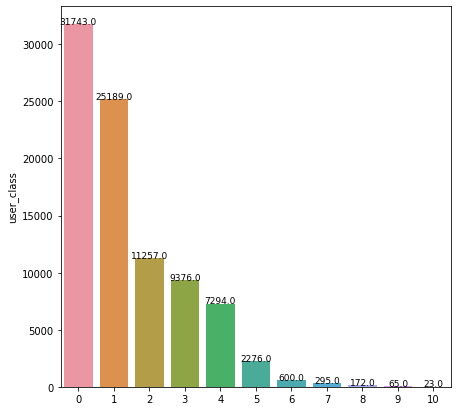

In [64]:
# Ïú†Ï†ÄÏùò ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨Î•º ÌôïÏù∏

plt.subplots(figsize=(7,7))
df_users.user_class.astype('str')
ax=sns.barplot(df_users.user_class.astype('str').value_counts().index,df_users.user_class.astype('str').value_counts())

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3.5, height, ha = 'center', size = 9)


classÍ∞Ä ÎÜíÏïÑÏßàÏàòÎ°ù Í∑∏Ïóê Ìï¥ÎãπÌïòÎäî Ïú†Ï†Ä ÏàòÎèÑ Í∞êÏÜå.

In [65]:
# Ïú†Ï†Ä Ìã∞Ïñ¥ Î∂ÑÏÑù

# Ïú†Ï†Ä Ìã∞Ïñ¥ ÌÜµÍ≥ÑÎ•º ÏÇ¥Ìé¥Î¥Ñ.
df_users.tier.describe()

count    88290.000000
mean         7.873157
std          5.144142
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max         31.000000
Name: tier, dtype: float64

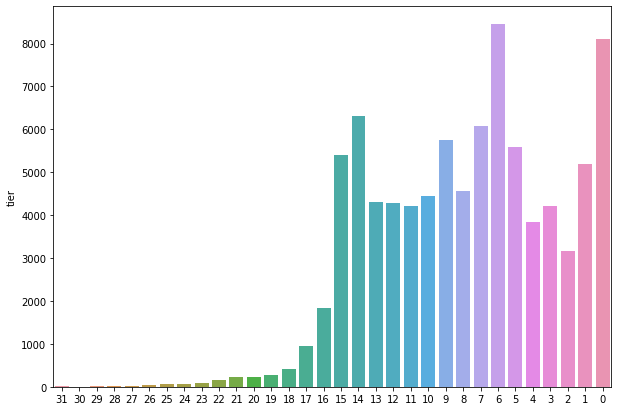

In [66]:
plt.subplots(figsize=(10,7))
df_users.tier.astype('str')
ax=sns.barplot(df_users.tier.astype('str').value_counts().index,df_users.tier.astype('str').value_counts(), order= df_users.tier.astype('str').unique())

user_classÏôÄ Îã¨Î¶¨ tierÎäî 0Í≥º 6-7(Ïã§Î≤Ñ 1~2) Ìã∞Ïñ¥Ïóê Ïú†Ï†ÄÎì§Ïù¥ ÎßéÏù¥ Î∂ÑÌè¨Ìï®.
  
14, 15 Ìã∞Ïñ¥Ïóê ÎòêÌïú Ïú†Ï†ÄÎì§Ïù¥ ÎßéÏù¥ Î∂ÑÌè¨.

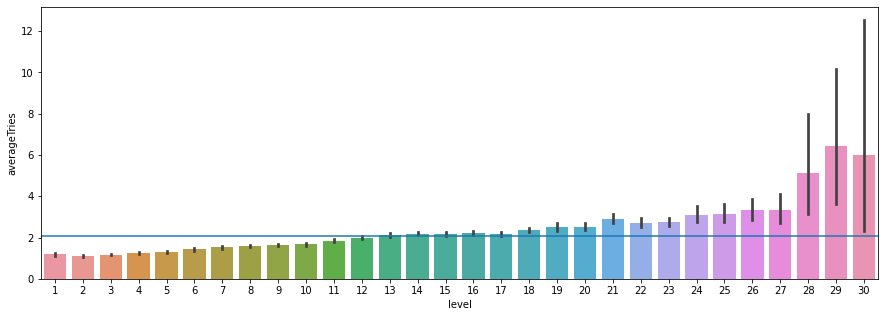

In [67]:
# Î¨∏Ï†ú Î†àÎ≤®Î≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

# Î¨∏Ï†ú Î†àÎ≤®Î≥Ñ Î¨∏Ï†ú ÌèâÍ∑† ÏãúÎèÑ ÌöüÏàò
plt.figure(figsize=(15,5))
graph = sns.barplot(x=df_problems.level, y=df_problems.averageTries)
graph.axhline(np.mean(df_problems.averageTries))
plt.show()

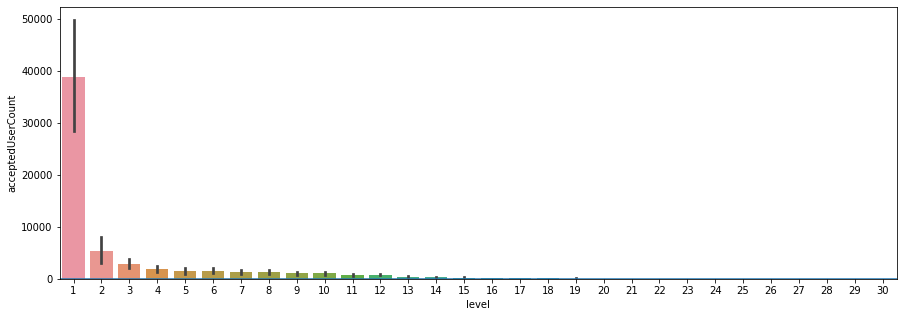

In [68]:
# Î¨∏Ï†ú Î†àÎ≤®Î≥Ñ ÎßûÌûå ÏÇ¨Îûå ÏàòÏùò Î∂ÑÌè¨

plt.figure(figsize=(15,5))
graph = sns.barplot(x=df_problems.level, y=df_problems.acceptedUserCount)
graph.axhline(np.mean(df_problems.averageTries))
plt.show()

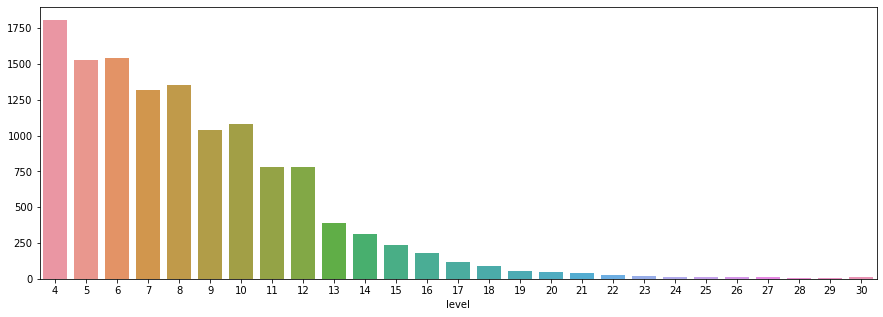

In [69]:
# Î†àÎ≤®Ïù¥ 1ÏóêÏÑú 3Ïù∏ Í≤ÉÏùÑ Ï†úÏô∏ÌïòÍ≥† Ï°∞Ìöå
tmp = df_problems.groupby('level')['acceptedUserCount'].mean()[df_problems.groupby('level')['acceptedUserCount'].mean() < 2000]

plt.figure(figsize=(15,5))
graph = sns.barplot(x=tmp.index, y=tmp.values)
plt.show()

ÎåÄÏ≤¥Î°ú ÏûÖÎ¨∏ Îã®Í≥ÑÏù∏ ÌïòÏúÑÍ∂å Î¨∏Ï†úÍ∞Ä ÎßéÏù¥ ÌíÄÎ†∏Í≥†, ÌïòÏúÑÍ∂å Î¨∏Ï†úÎ•º Ï†úÏô∏ÌïòÏó¨ÎèÑ Î¨∏Ï†úÏùò ÎÇúÏù¥ÎèÑÍ∞Ä ÎÜíÏïÑÏßà ÏàòÎ°ù ÎßûÌûå Ïú†Ï†ÄÏùò ÏàòÎäî Í∏âÍ≤©Ìûà Í∞êÏÜå.

In [70]:
# Î¨∏Ï†ú Î†àÎ≤®Î≥Ñ ÌÉúÍ∑∏ Î∂ÑÏÑù.

# Í∞Å Î¨∏Ï†ú Î†àÎ≤®Î≥Ñ ÌÉúÍ∑∏ Ï¢ÖÎ•òÏùò ÏàòÎ•º ÏßëÍ≥Ñ.


# tagÏóê nan Í∞íÏù¥ ÏûàÎäî ÌñâÎì§ ÏÇ≠Ï†ú
new_df_problems = df_problems.dropna()

# Í∞Å Î†àÎ≤®Î≥Ñ ÌÉúÍ∑∏ Ïú†ÌòïÎ≥Ñ Í∞úÏàò Ï†ÄÏû•
tags_per_level = {}

for x in df_problems.level.unique():
    levelx_tags = ','.join(new_df_problems[new_df_problems.level == x].tags.values).split(',')
    levelx_tags = pd.DataFrame(pd.Series(levelx_tags).value_counts())
    levelx_tags.reset_index(inplace=True, drop=False)
    levelx_tags.columns = ['tag', 'level'+str(x)]
    
    tags_per_level["level" + str(x)] = levelx_tags

In [71]:
# Î†àÎ≤® 1Ïùò ÌÉúÍ∑∏Î≥Ñ Î∂ÑÌè¨

# level1Ïù∏ Í≤ΩÏö∞
tags_per_level['level1']

tag  level1
0       implementation      69
1                 math      53
2           arithmetic      48
3  arbitrary_precision       9
4               string       9
5        combinatorics       1
6             geometry       1
7           simulation       1

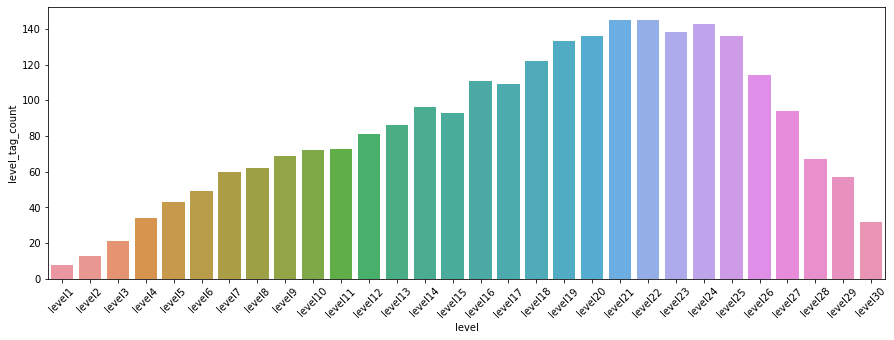

In [72]:
# Î¨∏Ï†úÏùò Î†àÎ≤®Î≥ÑÎ°ú ÏÜçÌï¥ÏûàÎäî ÌÉúÍ∑∏ Ïàò

level_tags = pd.DataFrame(columns={'level', 'level_tag_count'})

for i in range(1, 31):
    level_tags = level_tags.append({'level': 'level'+str(i), 'level_tag_count': len(tags_per_level['level'+str(i)])}, ignore_index=True)
    
plt.figure(figsize=(15,5))
graph = sns.barplot(x=level_tags.level, y=level_tags.level_tag_count)

for item in graph.get_xticklabels():
    item.set_rotation(45)

plt.show()

In [73]:
# ÌÉúÍ∑∏Î≥Ñ Î¨∏Ï†ú Î†àÎ≤® Î∂ÑÏÑù

# Í∞Å ÌÉúÍ∑∏Î≥ÑÎ°ú Í∞Å Î†àÎ≤®Ïóê Î™á Î≤à Îì±Ïû•ÌïòÎäîÏßÄ Íµ¨ÌïòÍ∏∞


# Í∞Å ÌÉúÍ∑∏Î≥Ñ Î™®Îì† Î†àÎ≤® Í∞íÏùÑ mergeÌïúÎã§.
tags_all_level = pd.merge(tags_per_level['level1'], tags_per_level['level2'], on='tag', how='outer')

for i in range(3, 31):
    tags_all_level = pd.merge(tags_all_level, tags_per_level['level'+str(i)], on='tag', how='outer')

In [74]:
tags_all_level.fillna(0, inplace=True)
tags_all_level.head()

tag  level1  level2  level3  level4  level5  level6  \
0       implementation    69.0    97.0   314.0   629.0   451.0   334.0   
1                 math    53.0    98.0   333.0   332.0   212.0   205.0   
2           arithmetic    48.0    77.0   229.0   166.0    58.0    28.0   
3  arbitrary_precision     9.0     1.0    10.0    16.0     4.0    16.0   
4               string     9.0    16.0    33.0   311.0   185.0   136.0   

   level7  level8  level9  ...  level21  level22  level23  level24  level25  \
0   298.0   256.0   208.0  ...     35.0     30.0     27.0     31.0     22.0   
1   214.0   217.0   216.0  ...    151.0    137.0     93.0     81.0     65.0   
2    20.0    15.0    15.0  ...      0.0      0.0      0.0      0.0      0.0   
3    12.0    11.0     4.0  ...      7.0      3.0      5.0      0.0      1.0   
4   129.0   132.0    89.0  ...     34.0     31.0     30.0     11.0     17.0   

   level26  level27  level28  level29  level30  
0     17.0      4.0      9.0      8.0      4.0  
1     45.0     32.0     21.0      6.0      5.0  
2      0.0      0.0      0.0      0.0      0.0  
3      3.0      1.0      1.0      0.0      1.0  
4     11.0      8.0      1.0      1.0      1.0  

[5 rows x 31 columns]

In [75]:
# Í∞Å ÌÉúÍ∑∏Î≥ÑÎ°ú Í∞Å Î†àÎ≤®Ïóê Ïñ¥ÎñªÍ≤å Î∂ÑÌè¨ÎêòÏñ¥ ÏûàÎäîÏßÄÎ•º ÌôïÏù∏

# Í∞Å Î†àÎ≥ÑÎ≥Ñ ÌÉúÍ∑∏Ïùò ÎπÑÏú® Î∂ÑÌè¨Î•º ÌôïÏù∏ÌïòÍ∏∞ (ÏÉÅÎåÄÎπÑÍµêÎ•º ÏúÑÌï¥ Í∞Å Î†àÎ≤®Ïùò ÌÉúÍ∑∏ Í∞úÏàòÎ•º Î¨∏Ï†ú Ïàò ÎßåÌÅº ÎÇòÎàÑÍ∏∞)
tags_all_level_ratio = tags_all_level.copy()

# Í∞Å Î†àÎ≤®Î≥Ñ Î¨∏Ï†ú Ïàò Ï†ïÎ¶¨
level_ques = pd.DataFrame(new_df_problems.level.value_counts())
level_ques.reset_index(inplace=True, drop=False)
level_ques.columns = ['level', 'nums']

# Í∞Å Î†àÎ≤®Ïùò ÌÉúÍ∑∏ Í∞úÏàòÏóêÏÑú Î¨∏Ï†ú Ïàò ÎÇòÎàÑÍ∏∞
for i in range(1, 31):
    tags_all_level_ratio['level'+str(i)] = tags_all_level['level'+str(i)]/level_ques[level_ques['level'] == i].nums.values[0]

In [76]:

tags_all_level_ratio

tag    level1    level2    level3    level4  \
0                  implementation  0.711340  0.638158  0.654167  0.760580   
1                            math  0.546392  0.644737  0.693750  0.401451   
2                      arithmetic  0.494845  0.506579  0.477083  0.200726   
3             arbitrary_precision  0.092784  0.006579  0.020833  0.019347   
4                          string  0.092784  0.105263  0.068750  0.376058   
..                            ...       ...       ...       ...       ...   
186  geometric_boolean_operations  0.000000  0.000000  0.000000  0.000000   
187                        a_star  0.000000  0.000000  0.000000  0.000000   
188                      top_tree  0.000000  0.000000  0.000000  0.000000   
189                       rb_tree  0.000000  0.000000  0.000000  0.000000   
190                    hackenbush  0.000000  0.000000  0.000000  0.000000   

       level5    level6    level7    level8    level9  ...   level21  \
0    0.730956  0.547541  0.426934  0.361072  0.279946  ...  0.055031   
1    0.343598  0.336066  0.306590  0.306065  0.290713  ...  0.237421   
2    0.094003  0.045902  0.028653  0.021157  0.020188  ...  0.000000   
3    0.006483  0.026230  0.017192  0.015515  0.005384  ...  0.011006   
4    0.299838  0.222951  0.184814  0.186178  0.119785  ...  0.053459   
..        ...       ...       ...       ...       ...  ...       ...   
186  0.000000  0.000000  0.000000  0.000000  0.000000  ...  0.000000   
187  0.000000  0.000000  0.000000  0.000000  0.000000  ...  0.000000   
188  0.000000  0.000000  0.000000  0.000000  0.000000  ...  0.000000   
189  0.000000  0.000000  0.000000  0.000000  0.000000  ...  0.000000   
190  0.000000  0.000000  0.000000  0.000000  0.000000  ...  0.000000   

      level22   level23   level24   level25   level26   level27   level28  \
0    0.053191  0.068878  0.107639  0.087649  0.093923  0.037736  0.163636   
1    0.242908  0.237245  0.281250  0.258964  0.248619  0.301887  0.381818   
2    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3    0.005319  0.012755  0.000000  0.003984  0.016575  0.009434  0.018182   
4    0.054965  0.076531  0.038194  0.067729  0.060773  0.075472  0.018182   
..        ...       ...       ...       ...       ...       ...       ...   
186  0.000000  0.000000  0.000000  0.007968  0.000000  0.000000  0.000000   
187  0.000000  0.000000  0.000000  0.003984  0.000000  0.000000  0.000000   
188  0.000000  0.000000  0.000000  0.000000  0.005525  0.000000  0.000000   
189  0.000000  0.000000  0.000000  0.000000  0.005525  0.000000  0.000000   
190  0.000000  0.000000  0.000000  0.000000  0.000000  0.009434  0.000000   

      level29   level30  
0    0.347826  0.307692  
1    0.260870  0.384615  
2    0.000000  0.000000  
3    0.000000  0.076923  
4    0.043478  0.076923  
..        ...       ...  
186  0.000000  0.000000  
187  0.000000  0.000000  
188  0.000000  0.076923  
189  0.000000  0.000000  
190  0.000000  0.000000  

[191 rows x 31 columns]

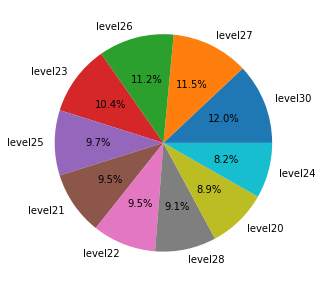

In [77]:
# Í∞ÄÏû• ÎåÄÌëúÏ†ÅÏù∏ ÌÉúÍ∑∏Ïù∏ data_structuresÎ•º ÏòàÏãúÎ°ú ÏÉÅÏúÑ Î†àÎ≤®ÏóêÏÑúÏùò Î∂ÑÌè¨Î°ú ÌôïÏù∏

tag_name = 'data_structures'

plt.figure(figsize=(5,5))

x = tags_all_level_ratio[tags_all_level_ratio['tag'] == tag_name].T.iloc[1:,:]
x.columns = ['ratio']
x = x.sort_values('ratio', ascending=False)[:10]

ratio = x['ratio'].values
labels = x.index

#explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]

plt.pie(ratio, labels=labels, autopct='%.1f%%')#, explode=explode)
plt.show()

ÎåÄÌëúÏ†ÅÏúºÎ°ú Í∏∞Î≥∏Ïù¥ ÎêòÎäî ÌÉúÍ∑∏Ïù∏ data_structuresÎäî ÎÇúÏù¥ÎèÑÎ≥Ñ Îì±Ïû• Î∂ÑÌè¨Í∞Ä Í≥®Í≥†Î£® ÎÇòÏò§Í∏∞ÎèÑ Ìï®.

In [78]:
# Í∞Å Î¨∏Ï†úÏùò ÌÉúÍ∑∏ Ï¢ÖÎ•ò Ïàò Î∂ÑÏÑù

# Í∞Å Î¨∏Ï†úÏóê ÌÉúÍ∑∏Í∞Ä Î™á Ï¢ÖÎ•ò Îì±Ïû•ÌïòÎäîÏßÄÎ•º ÌôïÏù∏

problem_tags = df_problems.tags.str.split(',')
problem_tags.fillna('0', inplace=True)
df_problems['tag_num'] = problem_tags.apply(lambda x: len(x))
df_problems.head()

problemId  titleKo  isSolvable  acceptedUserCount  level  averageTries  \
0       1000      A+B        True             199179      1             2   
1       1001      A-B        True             168110      1             1   
2       1002       ÌÑ∞Î†õ        True              28569      8             4   
3       1003  ÌîºÎ≥¥ÎÇòÏπò Ìï®Ïàò        True              37972      8             3   
4       1004    Ïñ¥Î¶∞ ÏôïÏûê        True              10649      8             2   

                             tags  tag_num  
0  implementation,arithmetic,math        3  
1  implementation,arithmetic,math        3  
2                   geometry,math        2  
3                              dp        1  
4                        geometry        1

In [79]:
# ÌÉúÍ∑∏Í∞Ä ÏóÜÎäî Î¨∏Ï†úÎèÑ tag_numÏù¥ 1Î°ú ÏßëÍ≥ÑÎêòÎäî ÌòÑÏÉÅ ÏóÜÏï†Í∏∞

# nullÏù∏ Ïù∏Îç±Ïä§Ïùò ÌÉúÍ∑∏ Í∞í Ï†úÍ±∞
tags_null_idx = df_problems[df_problems.tags.isnull()].index
df_problems.loc[tags_null_idx, 'tag_num'] -= 1

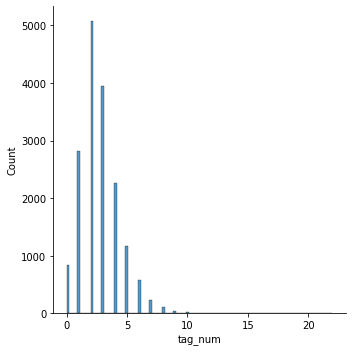

In [80]:
# Î¨∏Ï†úÎ≥Ñ ÌÉúÍ∑∏ Ï¢ÖÎ•ò Ïàò Î∂ÑÌè¨

sns.displot(df_problems.tag_num, bins=100)

ÎåÄÏ≤¥Î°ú Î¨∏Ï†úÎ≥ÑÎ°ú Îëê Í∞úÏùò ÌÉúÍ∑∏Í∞Ä Í∞ÄÏû• ÎßéÏù¥ Îì±Ïû•ÌïòÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïù¥ÎÑ§Ïöî.

In [81]:
# ÎùºÏù¥Î≤åÍ≥º Ïó≠ÎùºÏù¥Î≤å Ïàò Î∂ÑÏÑù

# Ïú†Ï†ÄÎ≥Ñ ÎùºÏù¥Î≤åÍ≥º Ïó≠ÎùºÏù¥Î≤å ÏàòÏóê Í¥ÄÌïú ÌÜµÍ≥Ñ ÏÇ¥Ìé¥Î¥Ñ

In [82]:
df_users.rival_count.describe()


count    88290.000000
mean         0.408200
std          2.371266
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        160.000000
Name: rival_count, dtype: float64

In [83]:
df_users.reverse_rival_count.describe()

count    88290.000000
mean         0.410171
std          1.864797
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        122.000000
Name: reverse_rival_count, dtype: float64

In [84]:
# ÏñºÎßàÎÇò ÎßéÏùÄ Ïú†Ï†ÄÍ∞Ä solved.acÏùò ÎùºÏù¥Î≤å Í∏∞Îä•ÏùÑ Ïù¥Ïö©ÌïòÍ≥† ÏûàÎäîÏßÄ?

print('rival ÏàòÍ∞Ä 0Ïù∏ Ïú†Ï†Ä ÎπÑÏú®:',sum(df_users.rival_count==0)/len(df_users))
print('reverse_rival ÏàòÍ∞Ä 0Ïù∏ Ïú†Ï†Ä ÎπÑÏú®:',sum(df_users.reverse_rival_count==0)/len(df_users))
print('reverse_rivalÍ≥º rival ÏàòÍ∞Ä 0Ïù∏ Ïú†Ï†Ä ÎπÑÏú®:',sum((df_users.reverse_rival_count==0) & (df_users.rival_count==0))/len(df_users))

rival ÏàòÍ∞Ä 0Ïù∏ Ïú†Ï†Ä ÎπÑÏú®: 0.890972930116661
reverse_rival ÏàòÍ∞Ä 0Ïù∏ Ïú†Ï†Ä ÎπÑÏú®: 0.8486125268999887
reverse_rivalÍ≥º rival ÏàòÍ∞Ä 0Ïù∏ Ïú†Ï†Ä ÎπÑÏú®: 0.828123230263903


Ï†ÑÏ≤¥ Ïú†Ï†Ä Ï§ë ÏïΩ 83%Í∞Ä ÌòÑÏû¨ Ï†úÍ≥µÎêòÍ≥† ÏûàÎäî ÎùºÏù¥Î≤å Í∏∞Îä•ÏùÑ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÍ≥† ÏûàÏùå. 
ÎåÄÎã§ÏàòÏùò Ïú†Ï†ÄÍ∞Ä ÎùºÏù¥Î≤å Í∏∞Îä•ÏùÑ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎäî ÎßåÌÅº, ÎùºÏù¥Î≤å Ï∂îÏ≤ú ÏÑúÎπÑÏä§Î•º Ï†úÍ≥µÌïòÎ©¥ Ï°∞Í∏àÏù¥ÎÇòÎßà ÎùºÏù¥Î≤å Í∏∞Îä•ÏùÑ ÌôúÏÑ±ÌôîÏãúÌÇ¨ Ïàò ÏûàÏßÄ ÏïäÏùÑÍπåÏöî?

üîñ ÎùºÏù¥Î≤å Í¥ÄÎ†® Ïã§Ìóò Î∞è Í≤∞Í≥º
  
ÎùºÏù¥Î≤åÏóê Í¥ÄÌï¥ Î∂ÑÏÑùÌïú Îç∞Ïù¥ÌÑ∞Î•º Î∞îÌÉïÏúºÎ°ú Í∞ÄÏÑ§ÏùÑ ÏÑ∏Ïö∞Í≥† Í≤ÄÏ¶ùÌï¥Î≥ºÍ≤åÏöî.
Ïù¥Î•º ÌÜµÌï¥ Ïñ¥Îñ§ Î∞©Î≤ïÏúºÎ°ú Ï∂îÏ≤ú Î™®Îç∏ÏùÑ ÎßåÎì§Ïñ¥Ïïº Ìï†ÏßÄ, ÌïÑÌÑ∞ÎßÅÏùÄ Ïñ¥Îñ§ ÏãùÏúºÎ°ú Ìï¥ÏïºÌï†ÏßÄ Í≥†ÎØºÌï¥ Î¥ÖÏãúÎã§.

In [85]:
# Í∞ÄÏÑ§ 1: ÎùºÏù¥Î≤åÏù¥ ÏûàÎäî Ïú†Ï†ÄÎì§ÏùÄ Í∑∏Î†áÏßÄ ÏïäÏùÄ Ïú†Ï†ÄÎì§Ïóê ÎπÑÌï¥ Î¨∏Ï†úÎ•º Îçî ÎßéÏù¥ ÌíâÎãàÎã§.

df_check_rival = df_users.copy()
df_check_rival['has_rival'] = 'NO'

idx = df_check_rival[df_check_rival.rival_count >= 1].index
df_check_rival.loc[idx, 'has_rival'] = 'YES'
df_check_rival

handle  solved_count  user_class  tier  rating  \
0                  koosaga         11522          10    31    3264   
1                 cki86201          6088          10    31    3225   
2      mitnegativeinfinity          2267          10    31    3176   
3                    ainta          4172          10    31    3156   
4                   yclock          2730          10    31    3126   
...                    ...           ...         ...   ...     ...   
89700          wish1234567            78           0     0       0   
89704              wjd0632            48           0     0       0   
89727            wodnr2203            97           0     0       0   
89759            yasuicide            45           0     0       0   
89763              ydh2244           765           0     0       0   

       rating_by_problems_sum  rating_by_class  rating_by_solved_count  \
0                        2814              250                     175   
1                        2775              250                     175   
2                        2726              250                     175   
3                        2706              250                     175   
4                        2676              250                     175   
...                       ...              ...                     ...   
89700                       0                0                       0   
89704                       0                0                       0   
89727                       0                0                       0   
89759                       0                0                       0   
89763                       0                0                       0   

               exp  rival_count  reverse_rival_count  max_streak    rank  \
0      15362924779            5                  122          24       1   
1      10013721021            0                   30           3       2   
2       6416744374            0                   12           8       3   
3       7428922337            0                   14           2       4   
4       4336235487            4                   16           6       5   
...            ...          ...                  ...         ...     ...   
89700            0            0                    1           9  166801   
89704            0            0                    0           5  166805   
89727            0            0                    0           3  166828   
89759            0            0                    0           0  166910   
89763            0            0                    2          12  166914   

       organization has_rival  
0             394.0       YES  
1             299.0        NO  
2             440.0        NO  
3             299.0        NO  
4             299.0       YES  
...             ...       ...  
89700         451.0        NO  
89704           NaN        NO  
89727        1348.0        NO  
89759           NaN        NO  
89763         755.0        NO  

[88290 rows x 15 columns]

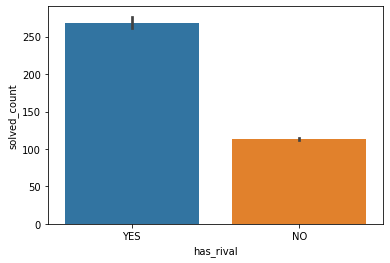

In [86]:
sns.barplot(x='has_rival', y = 'solved_count', data=df_check_rival)

rivalÏù¥ ÏûàÎäî Ïú†Ï†ÄÎì§Ïù¥ rivalÏù¥ ÏóÜÎäî Ïú†Ï†ÄÎì§Ïóê ÎπÑÏóê 2Î∞∞ Ïù¥ÏÉÅ Î¨∏Ï†úÎ•º Îçî ÎßéÏù¥ Ìë∏ÎÑ§Ïöî.
  
Ïó≠Ïãú ÎùºÏù¥Î≤å Í∏∞Îä•ÏùÑ Ïù¥Ïö©ÌïòÍ≥† ÏûàÎäî ÏÇ¨ÎûåÏùÄ ÏïåÍ≥†Î¶¨Ï¶ò Î¨∏Ï†úÎ•º ÎåÄÏ≤¥Î°ú Îçî ÎßéÏù¥ Ìë∏Îäî Í≤ÉÏúºÎ°ú Î≥¥ÏûÖÎãàÎã§.

In [87]:
df_check_rival['has_rival'] = np.where(df_check_rival['has_rival']=='YES', 1 ,0)
stats.pointbiserialr(df_check_rival['has_rival'], df_check_rival['solved_count']).correlation

0.2273032881308076

ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä 0.2273Î°ú ÏïΩÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïó¨Ï£ºÎÑ§Ïöî.
  
[Ï†ïÎ¶¨]
  
rivalÏùò Ïó¨Î∂ÄÏôÄ Î¨∏Ï†ú Ìë∏Îäî ÌöüÏàòÎäî ÏïΩÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥ÏûÖÎãàÎã§.
  
rivalÏù¥ ÏûàÎäî Ïú†Ï†ÄÎì§Ïù¥ rivalÏù¥ ÏóÜÎäî Ïú†Ï†ÄÎì§Ïóê ÎπÑÏóê 2Î∞∞ Ïù¥ÏÉÅÏùò Î¨∏Ï†úÎ•º Îçî ÎßéÏù¥ ÌíâÎãàÎã§.
  
‚Üí rivalÏù¥ ÏûàÏúºÎ©¥ Ïú†Ï†ÄÎì§Ïù¥ Î¨∏Ï†úÎ•º Îçî ÎßéÏù¥ ÌíâÎãàÎã§.
  
‚Üí rivalÏùÑ Îì±Î°ùÌï† Ïàò ÏûàÎèÑÎ°ù Ï†ÅÏ†àÌïú ÎùºÏù¥Î≤å Ï∂îÏ≤úÌï¥Ï£ºÎ©¥ Ïú†Ï†ÄÎì§Ïù¥ Î¨∏Ï†úÎ•º Îçî ÎßéÏù¥ ÌíÄÏñ¥ÏÑú Í∞úÏù∏ Ïã§Î†• Ìñ•ÏÉÅÍ≥º Î∞±Ï§Ä ÏÇ¨Ïù¥Ìä∏Ïùò ÌôúÏÑ±ÌôîÏóê ÎèÑÏõÄÏùÑ Ï§Ñ Í≤ÉÏúºÎ°ú Î≥¥ÏûÖÎãàÎã§. ü•≥

In [88]:
# Í∞ÄÏÑ§ 2: ÎùºÏù¥Î≤åÏù¥ ÎßéÏùÑÏàòÎ°ù Î¨∏Ï†úÎ•º Îçî ÎßéÏù¥ ÌíâÎãàÎã§.

# Í∞ÄÏÑ§ Î∞∞Í≤Ω: Ï†ÅÏ†àÌïú Ï∂îÏ≤ú ÎùºÏù¥Î≤å ÏàòÎ•º Ï∞æÍ∏∞ ÏúÑÌï¥

In [89]:
df_check_rival

handle  solved_count  user_class  tier  rating  \
0                  koosaga         11522          10    31    3264   
1                 cki86201          6088          10    31    3225   
2      mitnegativeinfinity          2267          10    31    3176   
3                    ainta          4172          10    31    3156   
4                   yclock          2730          10    31    3126   
...                    ...           ...         ...   ...     ...   
89700          wish1234567            78           0     0       0   
89704              wjd0632            48           0     0       0   
89727            wodnr2203            97           0     0       0   
89759            yasuicide            45           0     0       0   
89763              ydh2244           765           0     0       0   

       rating_by_problems_sum  rating_by_class  rating_by_solved_count  \
0                        2814              250                     175   
1                        2775              250                     175   
2                        2726              250                     175   
3                        2706              250                     175   
4                        2676              250                     175   
...                       ...              ...                     ...   
89700                       0                0                       0   
89704                       0                0                       0   
89727                       0                0                       0   
89759                       0                0                       0   
89763                       0                0                       0   

               exp  rival_count  reverse_rival_count  max_streak    rank  \
0      15362924779            5                  122          24       1   
1      10013721021            0                   30           3       2   
2       6416744374            0                   12           8       3   
3       7428922337            0                   14           2       4   
4       4336235487            4                   16           6       5   
...            ...          ...                  ...         ...     ...   
89700            0            0                    1           9  166801   
89704            0            0                    0           5  166805   
89727            0            0                    0           3  166828   
89759            0            0                    0           0  166910   
89763            0            0                    2          12  166914   

       organization  has_rival  
0             394.0          1  
1             299.0          0  
2             440.0          0  
3             299.0          0  
4             299.0          1  
...             ...        ...  
89700         451.0          0  
89704           NaN          0  
89727        1348.0          0  
89759           NaN          0  
89763         755.0          0  

[88290 rows x 15 columns]

In [90]:
df_has_rival = df_check_rival[df_check_rival.has_rival == 1]
df_has_rival

handle  solved_count  user_class  tier  rating  \
0          koosaga         11522          10    31    3264   
4           yclock          2730          10    31    3126   
5       opera_tive          5474          10    31    3123   
7         jhnah917          7558          10    31    3098   
8            serin          1026          10    31    3093   
...            ...           ...         ...   ...     ...   
89492     si964254            33           0     0       0   
89517  skyrachel07            93           0     0       0   
89522   smrmaak123            56           0     0       0   
89559       su8648            28           0     0       0   
89674      vvs1234           856           0     0       0   

       rating_by_problems_sum  rating_by_class  rating_by_solved_count  \
0                        2814              250                     175   
4                        2676              250                     175   
5                        2673              250                     175   
7                        2648              250                     175   
8                        2644              250                     174   
...                       ...              ...                     ...   
89492                       0                0                       0   
89517                       0                0                       0   
89522                       0                0                       0   
89559                       0                0                       0   
89674                       0                0                       0   

               exp  rival_count  reverse_rival_count  max_streak    rank  \
0      15362924779            5                  122          24       1   
4       4336235487            4                   16           6       5   
5       3225385433           15                   53         417       6   
7       4377949297           49                   67         417       8   
8       3212201357           18                   26         150       9   
...            ...          ...                  ...         ...     ...   
89492            0            3                    1           3  166343   
89517            0            1                    0           3  166418   
89522            0            4                    4           3  166423   
89559            0            1                    1           3  166510   
89674            0            1                    0           2  166725   

       organization  has_rival  
0             394.0          1  
4             299.0          1  
5               NaN          1  
7             323.0          1  
8             394.0          1  
...             ...        ...  
89492           NaN          1  
89517           NaN          1  
89522           NaN          1  
89559           NaN          1  
89674           NaN          1  

[9626 rows x 15 columns]

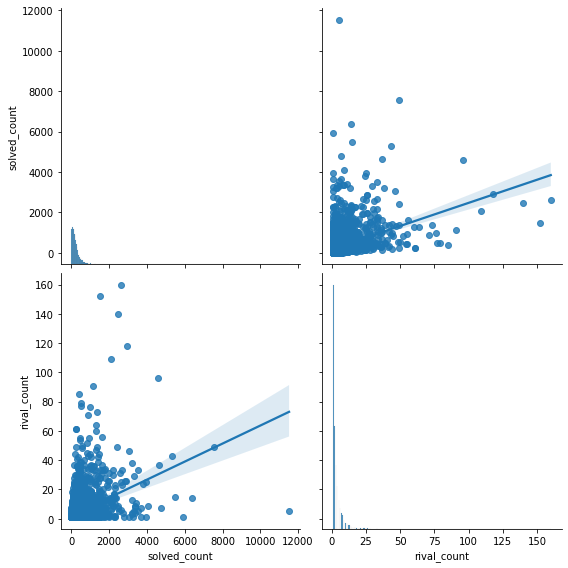

In [91]:
# rival_countÏôÄ solved_countÏôÄÏùò Í¥ÄÍ≥ÑÏÑ±ÏùÑ ÏãúÍ∞ÅÌôî.

df_for_pairplot = df_has_rival[['solved_count', 'rival_count']]
sns.pairplot(df_for_pairplot, kind='reg', height=4)  # ÌéòÏñ¥ÌîåÎ°Ø ÏûëÏÑ±

ÎùºÏù¥Î≤å ÏàòÏôÄ Ìëº Î¨∏Ï†ú Ïàò Í∞ÑÏùò ÏïΩÌïú Í¥ÄÍ≥ÑÏÑ±Ïù¥ ÏûàÏñ¥ Î≥¥ÏûÖÎãàÎã§.

In [92]:
# ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ†ï(ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≤ÄÏ†ï)ÏùÑ ÌÜµÌï¥ Íµ¨Ï≤¥Ï†ÅÏù∏ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌååÏïÖ. *******************************************************************
stats.pearsonr(df_has_rival.rival_count, df_has_rival.solved_count)

(0.37534573142087857, 9.813e-320)

ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ: 
  
p-value: 
  
    
[Ï†ïÎ¶¨]
  
ÎùºÏù¥Î≤åÏù¥ ÎßéÏùÑÏàòÎ°ù Î¨∏Ï†úÎ•º Ìë∏Îäî ÌöüÏàòÏôÄ ÏïΩÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥ÏûÖÎãàÎã§.
  
Ï†ÅÏ†àÌûà ÌÅ∞ ÎùºÏù¥Î≤å ÏàòÎ•º Ï†ïÌïòÎ©¥ Î¨∏Ï†ú Ìë∏Îäî ÌöüÏàòÍ∞Ä ÎäòÏñ¥ÎÇ† Í≤ÉÏúºÎ°ú Î≥¥ÏûÖÎãàÎã§.

In [93]:
# Ïã§Ìóò 1: ÎùºÏù¥Î≤åÏù¥ ÏûàÎäî Ïú†Ï†ÄÎì§Ïùò ÌèâÍ∑†Ï†ÅÏù∏ ÎùºÏù¥Î≤å ÏàòÎäî Î™á Î™ÖÏùºÍπåÏöî?

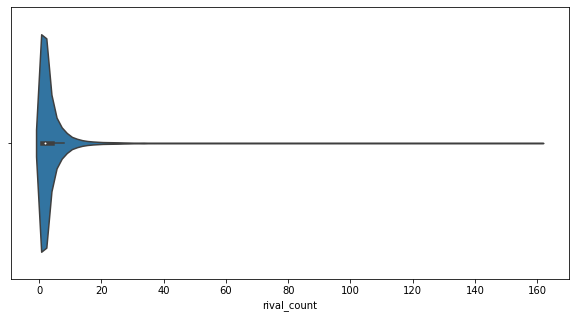

In [94]:
# Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Ïùò ÌòïÏÉÅÏùÑ Î≥¥Í∏∞ ÏúÑÌï¥ Î∞îÏù¥Ïò¨Î¶∞ ÌîåÎ°ØÏúºÎ°ú ÏãúÍ∞ÅÌôî. https://junklee.tistory.com/9
plt.figure(figsize=(10,5))
sns.violinplot(x='rival_count', data=df_has_rival)

In [95]:
# ÎùºÏù¥Î≤åÏùÑ 100Î™Ö Ïù¥ÏÉÅÏúºÎ°ú Ï†ïÌïú Ïú†Ï†ÄÎì§ ÌôïÏù∏
df_has_rival[df_has_rival.rival_count >=100]

handle  solved_count  user_class  tier  rating  \
148  tlsdydaud1          2612           8    25    2620   
200       dj035          1489           7    24    2538   
259   hibye1217          2443           7    23    2467   
549   malkoring          2087           7    21    2260   
613     hsh8086          2921           6    21    2229   

     rating_by_problems_sum  rating_by_class  rating_by_solved_count  \
148                    2190              230                     175   
200                    2118              220                     175   
259                    2047              220                     175   
549                    1841              220                     175   
613                    1819              210                     175   

           exp  rival_count  reverse_rival_count  max_streak  rank  \
148  591003201          160                   78         324   149   
200  308789395          152                   88          57   201   
259  291626527          140                   51         121   260   
549   89374309          109                   54         114   550   
613  124550632          118                   27         416   614   

     organization  has_rival  
148         425.0          1  
200        1026.0          1  
259         425.0          1  
549         436.0          1  
613         328.0          1

(-5.0, 15.0)

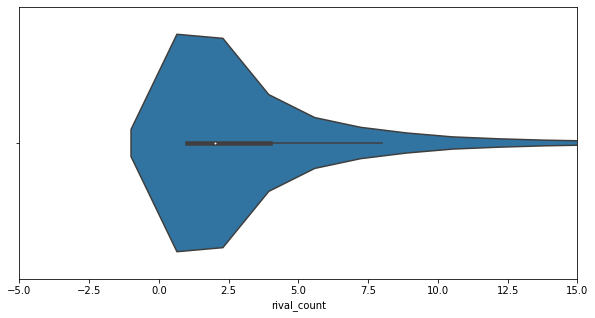

In [96]:
# outside pointÎ•º Ï†úÏô∏Ìïú Î∞îÏù¥Ïò¨Î¶∞ ÌîåÎ°ØÏùò Î∂ÄÎ∂Ñ ÌôïÎåÄ
plt.figure(figsize=(10,5))
fig = sns.violinplot(x='rival_count', data=df_has_rival)
fig.set_xlim([-5, 15])
#fig.set_ylim([-0.5, 0.5])

In [97]:
# ÌèâÍ∑†Ï†ÅÏù∏ rival Ïàò ÌôïÏù∏
print("ÌèâÍ∑† rival Ïàò:", round(np.mean(df_has_rival.rival_count), 2),'Î™Ö')

ÌèâÍ∑† rival Ïàò: 3.74 Î™Ö


[Ï†ïÎ¶¨]
  
outside point: 20Î™Ö Ïù¥ÏÉÅ
  
upper adjacent values(ÏÉÅÏúÑ Í∑ºÏ†ë Í∞í: Ìï¥Îãπ Í∞íÎ≥¥Îã§ ÌÅ¨Î©¥ Ïù¥ÏÉÅÏπòÎ°ú ÌåêÎ≥Ñ Í∞ÄÎä•): 8Î™Ö
  
median: ÏïΩ 2.5Î™Ö
  
mean ÏïΩ 3.74Î™Ö
  
‚Üí rival ÏàòÎäî 2~3Î™Ö Ï∂îÏ≤úÏúºÎ°ú Ïû°ÏïÑÎèÑ Îê† Í≤ÉÏúºÎ°ú Î≥¥ÏûÖÎãàÎã§. 

In [98]:
# Ïã§Ìóò 2: ÎùºÏù¥Î≤åÎ°ú ÏßÄÏ†ïÌï† ÎßåÌïú Ïú†Ï†ÄÎ•º Ï∞æÏïÑÎ≥ºÍπåÏöî?
# Í∏∞Ï§Ä: ÎÇòÏôÄ ÎπÑÏä∑Ìïú Ïã§Î†•Ïùò Ïú†Ï†Ä ÎòêÎäî ÎÇòÎ≥¥Îã§ Ïã§Î†•Ïù¥ Ï°∞Í∏à Îçî ÎÜíÏùÄ Ïú†Ï†Ä

In [99]:
df_users[df_users.handle == '1017hana']

handle  solved_count  user_class  tier  rating  \
36157  1017hana            62           0     9     569   

       rating_by_problems_sum  rating_by_class  rating_by_solved_count  \
36157                     522                0                      47   

          exp  rival_count  reverse_rival_count  max_streak   rank  \
36157  714510            0                    1           7  59708   

       organization  
36157           NaN

In [100]:
# tier 9(Silver II) Ï§ë  1017hanaÏùò ÎùºÏù¥Î≤å Ï∞æÏïÑÎ≥¥Í∏∞
df_tier_9 = df_users[df_users.tier == 9]
target_user = '1017hana' # ÏòàÏãúÎ°ú Ïì∏ ÌÉÄÍ≤ü Ïú†Ï†Ä

df_tier_9

handle  solved_count  user_class  tier  rating  \
33333          0601p            57           0     9     649   
33334  ambitiouskyle           174           2     9     649   
33335      ashilso29            95           1     9     649   
33336       chjisceo           121           2     9     649   
33337        chl8273           107           1     9     649   
...              ...           ...         ...   ...     ...   
39076      rupertjoo           100           2     9     500   
39077     shinhr0112           236           1     9     500   
39078      skarn2158            58           3     9     500   
39079      whrrk2001            59           0     9     500   
39080      yejin9487            89           2     9     500   

       rating_by_problems_sum  rating_by_class  rating_by_solved_count  \
33333                     606                0                      43   
33334                     497               50                     102   
33335                     558               25                      66   
33336                     519               50                      80   
33337                     551               25                      73   
...                       ...              ...                     ...   
39076                     381               50                      69   
39077                     354               25                     121   
39078                     356              100                      44   
39079                     455                0                      45   
39080                     387               50                      63   

           exp  rival_count  reverse_rival_count  max_streak   rank  \
33333  4542229            0                    0           4  54034   
33334   332778            2                    3           4  54035   
33335   980338            0                    0           0  54036   
33336   323938            0                    0           0  54037   
33337   685850            0                    0           2  54038   
...        ...          ...                  ...         ...    ...   
39076   201772            0                    0          12  65527   
39077   211637            0                    0           9  65528   
39078   285588            0                    0           5  65529   
39079   594274            0                    0           3  65530   
39080   223619            0                    0           2  65531   

       organization  
33333           NaN  
33334           NaN  
33335           NaN  
33336           NaN  
33337         229.0  
...             ...  
39076           NaN  
39077           NaN  
39078           NaN  
39079           NaN  
39080           NaN  

[5748 rows x 14 columns]

In [101]:
# 1. ÌÉÄÍ≤ü Ïú†Ï†ÄÏôÄ Í∞ôÍ±∞ÎÇò Ìïú Îã®Í≥Ñ ÎÜíÏùÄ Ìã∞Ïñ¥Î°ú Ïã§Î†• Î≤îÏúÑÎ•º Ï§ÑÏûÖÎãàÎã§.

In [102]:
print('ÌõÑÎ≥¥Ïàò Ï†Ñ:', len(df_users)-1)

df_tier_10 = df_users[df_users.tier == 10]
df_candi_by_tier = pd.concat([df_tier_9, df_tier_10], axis=0)

print('ÌõÑÎ≥¥Ïàò ÌõÑ:', len(df_candi_by_tier)-1)
df_candi_by_tier[df_candi_by_tier.tier == 9]

ÌõÑÎ≥¥Ïàò Ï†Ñ: 88289
ÌõÑÎ≥¥Ïàò ÌõÑ: 10195


handle  solved_count  user_class  tier  rating  \
33333          0601p            57           0     9     649   
33334  ambitiouskyle           174           2     9     649   
33335      ashilso29            95           1     9     649   
33336       chjisceo           121           2     9     649   
33337        chl8273           107           1     9     649   
...              ...           ...         ...   ...     ...   
39076      rupertjoo           100           2     9     500   
39077     shinhr0112           236           1     9     500   
39078      skarn2158            58           3     9     500   
39079      whrrk2001            59           0     9     500   
39080      yejin9487            89           2     9     500   

       rating_by_problems_sum  rating_by_class  rating_by_solved_count  \
33333                     606                0                      43   
33334                     497               50                     102   
33335                     558               25                      66   
33336                     519               50                      80   
33337                     551               25                      73   
...                       ...              ...                     ...   
39076                     381               50                      69   
39077                     354               25                     121   
39078                     356              100                      44   
39079                     455                0                      45   
39080                     387               50                      63   

           exp  rival_count  reverse_rival_count  max_streak   rank  \
33333  4542229            0                    0           4  54034   
33334   332778            2                    3           4  54035   
33335   980338            0                    0           0  54036   
33336   323938            0                    0           0  54037   
33337   685850            0                    0           2  54038   
...        ...          ...                  ...         ...    ...   
39076   201772            0                    0          12  65527   
39077   211637            0                    0           9  65528   
39078   285588            0                    0           5  65529   
39079   594274            0                    0           3  65530   
39080   223619            0                    0           2  65531   

       organization  
33333           NaN  
33334           NaN  
33335           NaN  
33336           NaN  
33337         229.0  
...             ...  
39076           NaN  
39077           NaN  
39078           NaN  
39079           NaN  
39080           NaN  

[5748 rows x 14 columns]

In [103]:
df_candi_by_tier[df_candi_by_tier.tier == 10]

handle  solved_count  user_class  tier  rating  \
28885          b9635005           103           0    10     799   
28886           ben3802           144           2    10     799   
28887  bright_night_sky           501           2    10     799   
28888           camosss            85           3    10     799   
28889        chlasnmzx2            99           1    10     799   
...                 ...           ...         ...   ...     ...   
33328           thqjarl            83           2    10     650   
33329          tjrkd222            99           1    10     650   
33330         whtjdwo98           105           2    10     650   
33331         whwlsgkr7           125           2    10     650   
33332        wooojin401           136           2    10     650   

       rating_by_problems_sum  rating_by_class  rating_by_solved_count  \
28885                     728                0                      71   
28886                     659               50                      90   
28887                     588               50                     161   
28888                     638              100                      61   
28889                     706               25                      68   
...                       ...              ...                     ...   
33328                     540               50                      60   
33329                     557               25                      68   
33330                     528               50                      72   
33331                     519               50                      81   
33332                     514               50                      86   

           exp  rival_count  reverse_rival_count  max_streak   rank  \
28885  2687717            0                    0           0  45136   
28886   561917            0                    0           3  45137   
28887   698580            0                    0           1  45138   
28888   891946            0                    0           5  45139   
28889  1340157            0                    2           6  45140   
...        ...          ...                  ...         ...    ...   
33328   437329            5                    5          10  54029   
33329   794529            0                    0           3  54030   
33330   605090            0                    0           5  54031   
33331   443764            0                    0           2  54032   
33332   303074            0                    0           3  54033   

       organization  
28885           NaN  
28886           NaN  
28887           NaN  
28888           NaN  
28889           NaN  
...             ...  
33328           NaN  
33329           NaN  
33330           NaN  
33331           NaN  
33332           NaN  

[4448 rows x 14 columns]

In [104]:
df_candi_by_tier.head()

handle  solved_count  user_class  tier  rating  \
33333          0601p            57           0     9     649   
33334  ambitiouskyle           174           2     9     649   
33335      ashilso29            95           1     9     649   
33336       chjisceo           121           2     9     649   
33337        chl8273           107           1     9     649   

       rating_by_problems_sum  rating_by_class  rating_by_solved_count  \
33333                     606                0                      43   
33334                     497               50                     102   
33335                     558               25                      66   
33336                     519               50                      80   
33337                     551               25                      73   

           exp  rival_count  reverse_rival_count  max_streak   rank  \
33333  4542229            0                    0           4  54034   
33334   332778            2                    3           4  54035   
33335   980338            0                    0           0  54036   
33336   323938            0                    0           0  54037   
33337   685850            0                    0           2  54038   

       organization  
33333           NaN  
33334           NaN  
33335           NaN  
33336           NaN  
33337         229.0

In [105]:
# 2. rating_by_problems_sum(Ìëº Î¨∏Ï†úÏùò ÎÇúÏù¥ÎèÑ Ìï©ÏúºÎ°ú Í≥ÑÏÇ∞Ìïú ÏÇ¨Ïö©ÏûêÏùò Î†àÏù¥ÌåÖ)Ïù¥ ÎπÑÏä∑Ìïú Ïú†Ï†ÄÎì§Î°ú Î≤îÏúÑ Ï§ÑÏù¥Í∏∞

In [106]:
t_rating_b_problems_sum = df_tier_9[df_tier_9.handle == target_user].rating_by_problems_sum.values[0] 
print(target_user+'Ïùò rating_by_problems_sum:', t_rating_b_problems_sum)

1017hanaÏùò rating_by_problems_sum: 522


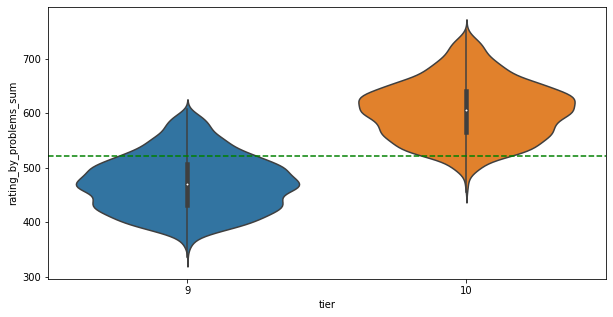

In [107]:
# target userÍ∞Ä ÏÜçÌïú Ìã∞Ïñ¥ÏôÄ Ìïú Îã®Í≥Ñ ÎÜíÏùÄ Ìã∞Ïñ¥ÏôÄÏùò rating_by_problems_sum Î∂ÑÌè¨ ÌôïÏù∏
# Ï¥àÎ°ùÏÉâ Ï†êÏÑ†: target userÏùò rating_by_problems_sum

plt.figure(figsize=(10,5))
sns.violinplot(x="tier", y="rating_by_problems_sum", data=df_candi_by_tier)
plt.axhline(y=t_rating_b_problems_sum, color='g', linestyle='--')

tier10Ïùò rating_by_problems_sum: 540


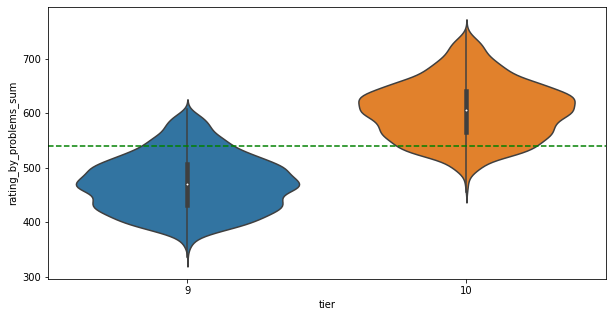

In [108]:
up_target_user = 'thqjarl' # ÏòàÏãúÎ°ú Ïì∏ ÌÉÄÍ≤ü Ïú†Ï†Ä
up_rating_b_problems_sum = df_tier_10[df_tier_10.handle == up_target_user].rating_by_problems_sum.values[0]
print('tier10Ïùò rating_by_problems_sum:', up_rating_b_problems_sum)

plt.figure(figsize=(10,5))
sns.violinplot(x="tier", y="rating_by_problems_sum", data=df_candi_by_tier)
plt.axhline(y=up_rating_b_problems_sum, color='g', linestyle='--')

ÌÉÄÍ≤ü Ïú†Ï†ÄÎäî ÌòÑÏû¨ ÏÜçÌïú Ìã∞Ïñ¥ÏóêÏÑú Ï§ëÏÉÅÏúÑÍ∂å Ïú†Ï†ÄÏûÑÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.
  
Ìïú Îã®Í≥Ñ ÎÜíÏùÄ Î†àÎ≤®ÏóêÏÑúÎèÑ ÌïòÏúÑÍ∂åÏóê ÏÜçÌï®ÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.
  
ÌÉÄÍ≤ü Ïú†Ï†ÄÎ≥¥Îã§ rating_by_problems_sumÏù¥ 100(ÏûÑÏãú) ÎÜíÏùÄ Ïú†Ï†ÄÎ°ú Î∞îÏö¥ÎçîÎ¶¨ Ï†ïÌïòÎäî Í≤å Ï¢ãÏïÑ Î≥¥ÏûÖÎãàÎã§. 

In [109]:
# ÌÉÄÍ≤ü Ïú†Ï†ÄÏùò rating_by_problems_sum <= ÌõÑÎ≥¥Íµ∞ rating_by_problems_sum <= ÌÉÄÍ≤ü Ïú†Ï†ÄÏùò rating_by_problems_sum + 100
threshold = 100

print('ÌõÑÎ≥¥Ïàò ÌõÑ:', len(df_candi_by_tier)-1)
df_candi_by_rbps = df_candi_by_tier[(df_candi_by_tier.rating_by_problems_sum >= t_rating_b_problems_sum) & (df_candi_by_tier.rating_by_problems_sum <= t_rating_b_problems_sum+threshold)]
print('ÌõÑÎ≥¥Ïàò ÌõÑ:',len(df_candi_by_rbps)-1)
df_candi_by_rbps.head()

ÌõÑÎ≥¥Ïàò ÌõÑ: 10195
ÌõÑÎ≥¥Ïàò ÌõÑ: 3535


handle  solved_count  user_class  tier  rating  \
33333        0601p            57           0     9     649   
33335    ashilso29            95           1     9     649   
33337      chl8273           107           1     9     649   
33338         csho           112           1     9     649   
33340  dltkdgkr123            96           1     9     649   

       rating_by_problems_sum  rating_by_class  rating_by_solved_count  \
33333                     606                0                      43   
33335                     558               25                      66   
33337                     551               25                      73   
33338                     549               25                      75   
33340                     557               25                      67   

           exp  rival_count  reverse_rival_count  max_streak   rank  \
33333  4542229            0                    0           4  54034   
33335   980338            0                    0           0  54036   
33337   685850            0                    0           2  54038   
33338   481349            0                    0           0  54039   
33340   807233            0                    0           7  54041   

       organization  
33333           NaN  
33335           NaN  
33337         229.0  
33338         272.0  
33340           NaN

# **PASS Processing df_problems_solved**

In [110]:
df_usp = pd.merge(df_users, df_problems_solved, on='handle')
# nullÏù¥ Îã¥Í∏¥ ÏÇ¨Ïö©Ïûê Ï†úÍ±∞
df_usp = df_usp[~df_usp.problems.isnull()]
df_usp

handle  solved_count  user_class  tier  rating  \
0                   koosaga         11522          10    31    3264   
1                  cki86201          6088          10    31    3225   
2       mitnegativeinfinity          2267          10    31    3176   
3                     ainta          4172          10    31    3156   
4                    yclock          2730          10    31    3126   
...                     ...           ...         ...   ...     ...   
100949          wish1234567            78           0     0       0   
100950              wjd0632            48           0     0       0   
100951            wodnr2203            97           0     0       0   
100952            yasuicide            45           0     0       0   
100953              ydh2244           765           0     0       0   

        rating_by_problems_sum  rating_by_class  rating_by_solved_count  \
0                         2814              250                     175   
1                         2775              250                     175   
2                         2726              250                     175   
3                         2706              250                     175   
4                         2676              250                     175   
...                        ...              ...                     ...   
100949                       0                0                       0   
100950                       0                0                       0   
100951                       0                0                       0   
100952                       0                0                       0   
100953                       0                0                       0   

                exp  rival_count  reverse_rival_count  max_streak    rank  \
0       15362924779            5                  122          24       1   
1       10013721021            0                   30           3       2   
2        6416744374            0                   12           8       3   
3        7428922337            0                   14           2       4   
4        4336235487            4                   16           6       5   
...             ...          ...                  ...         ...     ...   
100949            0            0                    1           9  166801   
100950            0            0                    0           5  166805   
100951            0            0                    0           3  166828   
100952            0            0                    0           0  166910   
100953            0            0                    2          12  166914   

        organization     id  \
0              394.0      1   
1              299.0      2   
2              440.0      3   
3              299.0      4   
4              299.0      5   
...              ...    ...   
100949         451.0  89701   
100950           NaN  89705   
100951        1348.0  89728   
100952           NaN  89760   
100953         755.0  89764   

                                                 problems   num  
0       1000,1001,1002,1003,1004,1005,1006,1007,1008,1...  6094  
1       1000,1001,1002,1003,1004,1005,1006,1007,1008,1...  5867  
2       1000,1001,1019,1056,1067,1144,1150,1311,1372,1...  2269  
3       1000,1001,1002,1003,1004,1005,1007,1008,1009,1...  4207  
4       1000,1001,1002,1003,1004,1005,1007,1008,1009,1...  2753  
...                                                   ...   ...  
100949  1000,1001,1008,1050,1110,1112,1152,1271,1330,1...    78  
100950  1000,1001,1002,1008,1020,1182,1269,1654,1707,1...    47  
100951  1000,1001,1002,1003,1008,1009,1010,1032,1037,1...   109  
100952  1201,1260,1787,1920,2178,5466,5537,8131,8873,8...    42  
100953  1000,1001,1003,1008,1010,1012,1014,1017,1018,1...   771  

[100610 rows x 17 columns]

In [111]:
# 3. ÌÉÄÍ≤ü Ïú†Ï†Ä Ìëº ÌÉúÍ∑∏ Í∏∞Î∞òÏúºÎ°ú ÎÇòÏùò Î∂ÄÏ°±Ìïú Ï†êÏùÑ Îçî ÎßéÏù¥ Ìëº Ïú†Ï†Ä Ï∞æÍ∏∞

In [112]:
df_problems = df_problems[df_problems.level != 0]
# not_solvable == FalseÎßå
df_problems = df_problems[df_problems.isSolvable == True]
# tagÍ∞Ä nanÏù∏ Î¨∏Ï†ú Ï†úÍ±∞
df_problems = df_problems[~df_problems.tags.isnull()]
df_problems.head()

problemId  titleKo  isSolvable  acceptedUserCount  level  averageTries  \
0       1000      A+B        True             199179      1             2   
1       1001      A-B        True             168110      1             1   
2       1002       ÌÑ∞Î†õ        True              28569      8             4   
3       1003  ÌîºÎ≥¥ÎÇòÏπò Ìï®Ïàò        True              37972      8             3   
4       1004    Ïñ¥Î¶∞ ÏôïÏûê        True              10649      8             2   

                             tags  tag_num  
0  implementation,arithmetic,math        3  
1  implementation,arithmetic,math        3  
2                   geometry,math        2  
3                              dp        1  
4                        geometry        1

In [113]:
# ÌõÑÎ≥¥ Ïú†Ï†ÄÎì§Îßå Ï∂îÎ¶¨Í∏∞  PASS Processing df_problems_solved
candi_users = df_candi_by_rbps.handle.values
df_usp_candi = df_usp[df_usp.handle.isin(candi_users)]
df_usp_candi

handle  solved_count  user_class  tier  rating  \
41492      bright_night_sky           501           2    10     799   
41502             gmltn1564           145           3    10     799   
41512  machinelearningquant           143           3    10     799   
41529              dkan9634           257           2    10     798   
41534               eos0103           294           2    10     798   
...                     ...           ...         ...   ...     ...   
49164                   skk            42           0     9     559   
49165                skyfly            41           0     9     559   
49228            lovecall27            41           0     9     557   
49248            bangjook88            41           0     9     556   
49453                   lgn            29           0     9     552   

       rating_by_problems_sum  rating_by_class  rating_by_solved_count  \
41492                     588               50                     161   
41502                     609              100                      90   
41512                     609              100                      90   
41529                     621               50                     127   
41534                     613               50                     135   
...                       ...              ...                     ...   
49164                     526                0                      33   
49165                     526                0                      33   
49228                     524                0                      33   
49248                     523                0                      33   
49453                     528                0                      24   

            exp  rival_count  reverse_rival_count  max_streak   rank  \
41492    698580            0                    0           1  45138   
41502    463962            0                    0           4  45148   
41512    663172            0                    1          13  45208   
41529    556078            0                    0          23  45225   
41534    850858            0                    0           1  45230   
...         ...          ...                  ...         ...    ...   
49164   2374102            2                    1           2  60504   
49165   7872076            0                    0           1  60505   
49228   6081819            0                    0           2  60618   
49248   3333557            0                    0           2  60638   
49453  43665701            0                    0           3  61043   

       organization     id                                           problems  \
41492           NaN  28888  1000,1001,1008,1009,1026,1032,1065,1075,1076,1...   
41502         425.0  28898  1000,1001,1002,1003,1008,1011,1012,1021,1026,1...   
41512           NaN  28908  1000,1001,1003,1008,1065,1085,1110,1152,1157,1...   
41529         356.0  28925  1000,1001,1008,1010,1026,1037,1065,1085,1110,1...   
41534           NaN  28930  1000,1001,1008,1018,1037,1065,1075,1076,1085,1...   
...             ...    ...                                                ...   
49164           NaN  36554  1197,1208,1238,1253,1261,1463,1655,1670,1717,1...   
49165           NaN  36555  1000,1077,1654,1658,1707,1708,1753,1790,1912,2...   
49228           NaN  36618  1012,1026,1043,1120,1138,1181,1197,1238,1260,1...   
49248           NaN  36638  1185,1197,1260,1463,1477,1516,1517,1654,1697,1...   
49453           NaN  36843  1218,1624,1848,2263,2561,2595,2601,2969,3990,4...   

       num  
41492  501  
41502  145  
41512  143  
41529  274  
41534  295  
...    ...  
49164   42  
49165   42  
49228   94  
49248   41  
49453   29  

[3529 rows x 17 columns]

In [114]:
# ÌïÑÏöîÌïú ÌÉúÍ∑∏ ÏπºÎüº Ï†ïÎ¶¨ÌïòÍ∏∞
tags = ['math', 'implementation', 'greedy', 'string', 'data-structures', 'geometry', 'dp', 'dfs', 'bfs']
for x in tags:
    df_usp_candi[x] = 0

df_usp_candi

handle  solved_count  user_class  tier  rating  \
41492      bright_night_sky           501           2    10     799   
41502             gmltn1564           145           3    10     799   
41512  machinelearningquant           143           3    10     799   
41529              dkan9634           257           2    10     798   
41534               eos0103           294           2    10     798   
...                     ...           ...         ...   ...     ...   
49164                   skk            42           0     9     559   
49165                skyfly            41           0     9     559   
49228            lovecall27            41           0     9     557   
49248            bangjook88            41           0     9     556   
49453                   lgn            29           0     9     552   

       rating_by_problems_sum  rating_by_class  rating_by_solved_count  \
41492                     588               50                     161   
41502                     609              100                      90   
41512                     609              100                      90   
41529                     621               50                     127   
41534                     613               50                     135   
...                       ...              ...                     ...   
49164                     526                0                      33   
49165                     526                0                      33   
49228                     524                0                      33   
49248                     523                0                      33   
49453                     528                0                      24   

            exp  rival_count  ...  num  math  implementation  greedy  string  \
41492    698580            0  ...  501     0               0       0       0   
41502    463962            0  ...  145     0               0       0       0   
41512    663172            0  ...  143     0               0       0       0   
41529    556078            0  ...  274     0               0       0       0   
41534    850858            0  ...  295     0               0       0       0   
...         ...          ...  ...  ...   ...             ...     ...     ...   
49164   2374102            2  ...   42     0               0       0       0   
49165   7872076            0  ...   42     0               0       0       0   
49228   6081819            0  ...   94     0               0       0       0   
49248   3333557            0  ...   41     0               0       0       0   
49453  43665701            0  ...   29     0               0       0       0   

      data-structures  geometry  dp  dfs  bfs  
41492               0         0   0    0    0  
41502               0         0   0    0    0  
41512               0         0   0    0    0  
41529               0         0   0    0    0  
41534               0         0   0    0    0  
...               ...       ...  ..  ...  ...  
49164               0         0   0    0    0  
49165               0         0   0    0    0  
49228               0         0   0    0    0  
49248               0         0   0    0    0  
49453               0         0   0    0    0  

[3529 rows x 26 columns]

In [115]:
def class_user_tag(df):    
    # ÌäπÏ†ï Ïú†Ï†ÄÍ∞Ä Ìëº problems Íµ¨ÌïòÍ∏∞
    for user in tqdm(candi_users):
        if (len(df[df.handle == user].problems.values) == 0):
            continue;
        df_one_user_problems = df[df.handle == user].problems.values[0]
        one_user_problems = df_one_user_problems.split(',')

        # ÌäπÏ†ï Ïú†Ï†ÄÍ∞Ä Ìëº problemsÏùò ÌÉúÍ∑∏ Í∞íÎì§ Íµ¨ÌïòÍ∏∞
        user_tag = []
        for i in range(len(one_user_problems)):
            one_problem = df_problems[df_problems.problemId == int(one_user_problems[i])]
            one_problem_tags = ','.join(one_problem.tags.values).split(',')
            user_tag.extend(one_problem_tags)

        # ÌäπÏ†ï Ïú†Ï†ÄÍ∞Ä Ìëº ÌÉúÍ∑∏Î≥Ñ Í∞úÏàò Íµ¨ÌïòÍ∏∞: e.g. counts = {'arithmetic': 1, 'implementation': 3, 'math': 10, ... }
        counts = dict()
        for i in user_tag:
            counts[i] = counts.get(i, 0) + 1

        # ÌäπÏ†ï Ïú†Ï†ÄÏùò ÌÉúÍ∑∏ ÏπºÎüºÏóê Í∞Å ÌÉúÍ∑∏ Í∞í ÎÑ£Í∏∞
        idx = df[df['handle'] == user].index
        for k, v in counts.items():
            if k in df.columns:
                df.loc[idx, k] = v

    return df

In [116]:
df_candi_with_tags = class_user_tag(df_usp_candi)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3536/3536 [05:05<00:00, 11.59it/s]


In [117]:
# ÎùºÏù¥Î≤å Ïú†Ï†ÄÍµ∞Îì§Ïùò Ìëº ÌÉúÍ∑∏ ÏàòÏôÄ ÌÉÄÍ≤ü Ïú†Ï†ÄÍ∞Ä Ìëº ÌÉúÍ∑∏ Ïàò ÌôïÏù∏
df_target_candi_tags = pd.DataFrame(df_candi_with_tags.sum(axis=0)[tags]).reset_index()
df_target_candi_tags.columns = ['tags', 'num']
df_target_candi_tags.num = df_target_candi_tags.num/len(df_candi_with_tags)

target_tags_values = df_candi_with_tags[df_candi_with_tags.handle == target_user][tags].values
df_target_candi_tags['target'] = target_tags_values[0]
df_target_candi_tags

tags        num  target
0             math  49.041088      10
1   implementation  61.148767       7
2           greedy    5.97393       7
3           string  15.007934       7
4  data-structures        0.0       0
5         geometry    3.28195       1
6               dp   9.493341      12
7              dfs   3.514877       5
8              bfs   5.597053       9

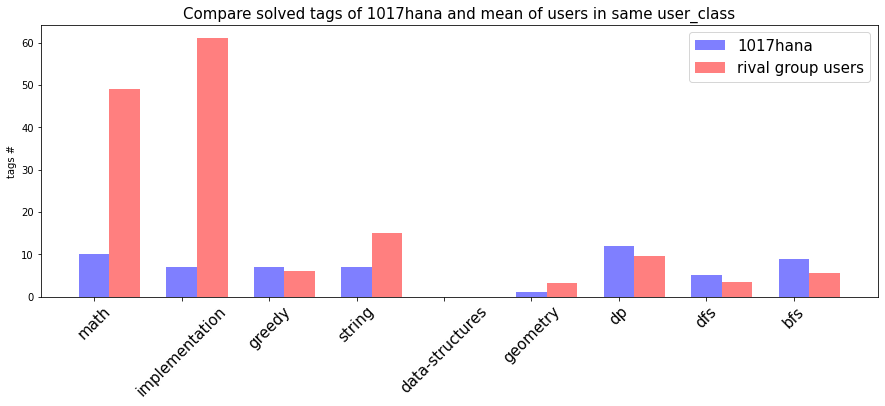

In [118]:
# ÎùºÏù¥Î≤å Ïú†Ï†ÄÍµ∞ Î≥¥Îã§ ÎÇ¥Í∞Ä Î∂ÄÏ°±Ìïú ÌÉúÍ∑∏ Î∂ÄÎ∂Ñ ÌôïÏù∏
bar_width = 0.35
alpha = 0.5
index = np.arange(9)
label = df_target_candi_tags.tags

plt.figure(figsize=(15,5))
p1 = plt.bar(index, df_target_candi_tags.target, bar_width, 
             color='b', alpha=alpha,label=target_user)

p2 = plt.bar(index + bar_width, df_target_candi_tags.num, bar_width, 
            color='r', alpha=alpha,label='mean_users')

plt.title('Compare solved tags of '+target_user+' and mean of users in same user_class', fontsize=15)
plt.ylabel('tags #', fontsize=10)
#plt.xlabel('tags', fontsize=18)
plt.xticks(index, label, fontsize=15, rotation=45)
plt.legend((p1[0], p2[0]), (target_user, 'rival group users'), fontsize=15)
plt.show()

ÌÉÄÍ≤ü Ïú†Ï†ÄÎäî ÎùºÏù¥Î≤å Ïú†Ï†ÄÍµ∞Î≥¥Îã§ Implementation, math, (string, geometry) Î•º Ï†ÅÍ≤å 

ÌíÄÏóàÏäµÎãàÎã§.
  
greedy, dp, dfs, bfsÎäî Îçî ÎßéÏù¥ ÌíÄÏóàÏùåÏùÑ Ïïå Ïàò ÏûàÎÑ§Ïöî. üòé

In [119]:
need_more_tags = df_target_candi_tags[df_target_candi_tags.num > df_target_candi_tags.target].tags.values
need_more_tags

array(['math', 'implementation', 'string', 'geometry'], dtype=object)

In [120]:
# ÎùºÏù¥Î≤å Ïú†Ï†ÄÍµ∞Îì§ Ï§ëÏóêÏÑú ÎÇ¥Í∞Ä Î∂ÄÏ°±Ìïú Î∂ÄÎ∂ÑÏùÑ Îçî Í≥µÎ∂ÄÌïú Ïú†Ï†Ä ÌôïÏù∏
tag_candi = df_candi_with_tags.copy()

print('ÌõÑÎ≥¥Ïàò ÌõÑ:',len(df_candi_by_rbps)-1)
for x in need_more_tags:
    tag_candi = tag_candi[tag_candi[x] >= tag_candi[tag_candi.handle==target_user][x].values[0]]
    print(x+' ÌÉúÍ∑∏ ÌïÑÌÑ∞ÎßÅ ÌõÑ: ', end='')
    print(len(tag_candi)-1)

ÌõÑÎ≥¥Ïàò ÌõÑ: 3535
math ÌÉúÍ∑∏ ÌïÑÌÑ∞ÎßÅ ÌõÑ: 3253
implementation ÌÉúÍ∑∏ ÌïÑÌÑ∞ÎßÅ ÌõÑ: 3231
string ÌÉúÍ∑∏ ÌïÑÌÑ∞ÎßÅ ÌõÑ: 2787
geometry ÌÉúÍ∑∏ ÌïÑÌÑ∞ÎßÅ ÌõÑ: 2475


In [121]:
# 4. ÌõÑÎ≥¥Íµ∞Îì§ Ï§ë ÎûúÎç§ÏúºÎ°ú 3Î™ÖÏùÑ Ï∂îÏ∂úÌï¥Î¥ÖÎãàÎã§.

In [122]:
seed = 42

fin_candi = tag_candi[tag_candi.handle != target_user].reset_index()

seq = list(np.arange(len(fin_candi)))
random.seed(seed)
target_rivals_3 = random.sample(seq, 3)
target_rivals_3

[456, 102, 1126]

In [123]:
fin_candi.iloc[target_rivals_3]

index        handle  solved_count  user_class  tier  rating  \
456   43153  ghdtmddk1516           130           2    10     739   
102   42313      lego7457           197           2    10     767   
1126  44239       jcy6343           128           2    10     702   

      rating_by_problems_sum  rating_by_class  rating_by_solved_count  \
456                      605               50                      84   
102                      607               50                     110   
1126                     569               50                      83   

          exp  ...  num  math  implementation  greedy  string  \
456    762678  ...  132    49              74       1      18   
102    516114  ...  199    97             110       6      13   
1126  2989963  ...  128    65              74       3      14   

      data-structures geometry  dp  dfs  bfs  
456                 0        2   3   14   16  
102                 0        8  17    4    5  
1126                0        5   5    2    2  

[3 rows x 27 columns]

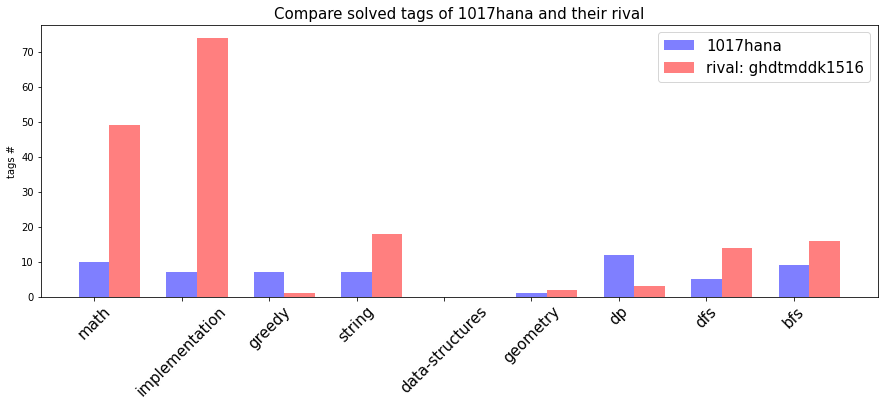

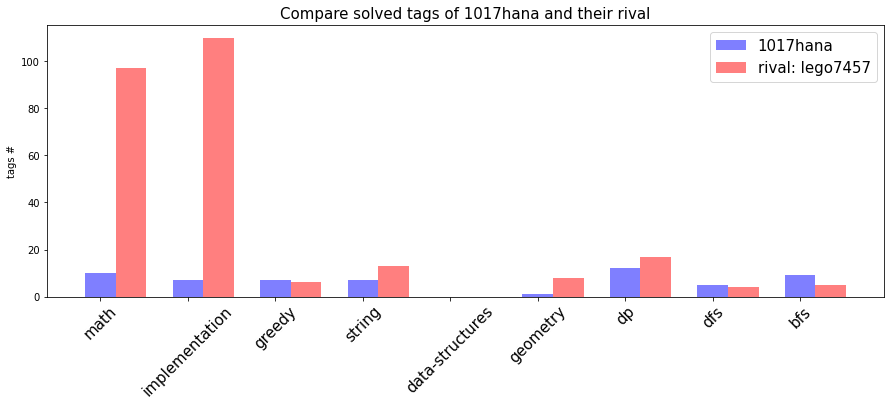

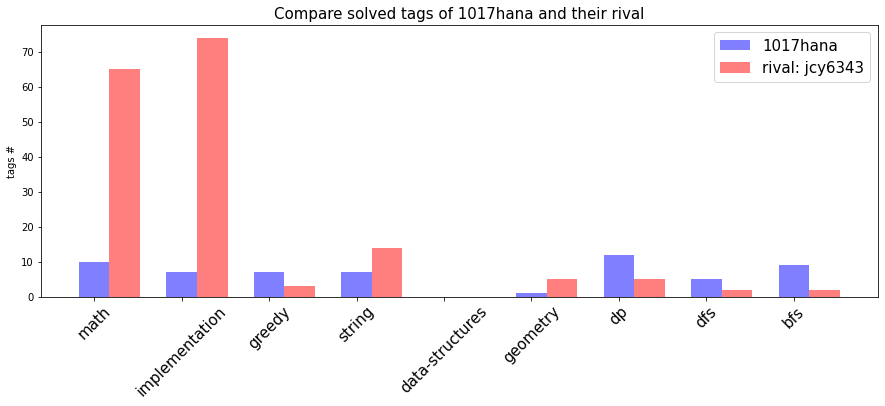

In [124]:
# ÎùºÏù¥Î≤å Ïú†Ï†ÄÍµ∞ Î≥¥Îã§ ÎÇ¥Í∞Ä Î∂ÄÏ°±Ìïú ÌÉúÍ∑∏ Î∂ÄÎ∂Ñ ÌôïÏù∏
bar_width = 0.35
alpha = 0.5
index = np.arange(9)
label = df_target_candi_tags.tags

for i in range(3):
    rival_data = fin_candi.iloc[target_rivals_3[i]]
    plt.figure(figsize=(15,5))
    p1 = plt.bar(index, tag_candi[tag_candi.handle == target_user][tags].values[0], bar_width, 
                color='b', alpha=alpha,label=target_user)

    p2 = plt.bar(index + bar_width, rival_data[tags].values, bar_width, 
                color='r', alpha=alpha,label='mean_users')

    plt.title('Compare solved tags of '+target_user+' and their rival', fontsize=15)
    plt.ylabel('tags #', fontsize=10)
    #plt.xlabel('tags', fontsize=18)
    plt.xticks(index, label, fontsize=15, rotation=45)
    plt.legend((p1[0], p2[0]), (target_user, 'rival: '+rival_data.handle), fontsize=15)
    plt.show()

ÎπÑÏä∑Ìïú ÎùºÏù¥Î≤åÍ≥º ÎπÑÍµêÌñàÏùÑ Îïå ÌÉÄÍ≤ü Ïú†Ï†ÄÍ∞Ä ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Îçú Ìëº ÌÉúÍ∑∏ Ïú†ÌòïÏù¥ Î≥¥Ïù¥ÎÑ§Ïöî.

## üí° Ïú†Ï†ÄÏôÄ Î¨∏Ï†úÌíÄÏù¥ Í¥ÄÎ†® Ïã§Ìóò Î∞è Í≤∞Í≥º
  
Ïú†Ï†ÄÏôÄ Î¨∏Ï†ú ÌíÄÏù¥Ïóê Í¥ÄÌï¥ Î∂ÑÏÑùÌïú Îç∞Ïù¥ÌÑ∞Î•º Î∞îÌÉïÏúºÎ°ú Í∞ÄÏÑ§ÏùÑ ÏÑ∏Ïö∞Í≥† Í≤ÄÏ¶ùÌï¥Î≥ºÍ≤åÏöî.

Ïù¥Î•º ÌÜµÌï¥ Ïñ¥Îñ§ Î∞©Î≤ïÏúºÎ°ú Ï∂îÏ≤ú Î™®Îç∏ÏùÑ ÎßåÎì§Ïñ¥Ïïº Ìï†ÏßÄ, ÌïÑÌÑ∞ÎßÅÏùÄ Ïñ¥Îñ§ ÏãùÏúºÎ°ú Ìï¥ÏïºÌï†ÏßÄ Í≥†ÎØºÌï¥ Î¥ÖÏãúÎã§.

Í∞ÄÏÑ§. Ïú†Ï†Ä ÌÅ¥ÎûòÏä§Î≥Ñ ÎßéÏù¥ Ìë∏Îäî ÌÉúÍ∑∏ Ïú†ÌòïÏù¥ ÏûàÏùÑ Í≤ÉÏûÖÎãàÎã§.
  
Ïö∞ÏÑ† uniqueÌïú ÌÉúÍ∑∏ Í∞íÏùÑ Íµ¨ÌïòÏó¨ ÏÉàÎ°úÏö¥ ÏπºÎüºÏúºÎ°ú Ï∂îÍ∞ÄÌï¥ Î¥ÖÏãúÎã§. üòè

In [125]:
unique_tags = []
all_tags = df_problems.tags.str.split(',').values

for x in all_tags:
    unique_tags.extend(x)
    
unique_tags = set(unique_tags)

In [126]:
# ÏÉàÎ°úÏö¥ ÏπºÎüºÏúºÎ°ú Ï∂îÍ∞ÄÌïòÍ∏∞
tmp = df_usp.copy()

for x in unique_tags:
    tmp[x] = 0
tmp

handle  solved_count  user_class  tier  rating  \
0                   koosaga         11522          10    31    3264   
1                  cki86201          6088          10    31    3225   
2       mitnegativeinfinity          2267          10    31    3176   
3                     ainta          4172          10    31    3156   
4                    yclock          2730          10    31    3126   
...                     ...           ...         ...   ...     ...   
100949          wish1234567            78           0     0       0   
100950              wjd0632            48           0     0       0   
100951            wodnr2203            97           0     0       0   
100952            yasuicide            45           0     0       0   
100953              ydh2244           765           0     0       0   

        rating_by_problems_sum  rating_by_class  rating_by_solved_count  \
0                         2814              250                     175   
1                         2775              250                     175   
2                         2726              250                     175   
3                         2706              250                     175   
4                         2676              250                     175   
...                        ...              ...                     ...   
100949                       0                0                       0   
100950                       0                0                       0   
100951                       0                0                       0   
100952                       0                0                       0   
100953                       0                0                       0   

                exp  rival_count  ...  precomputation  hirschberg  \
0       15362924779            5  ...               0           0   
1       10013721021            0  ...               0           0   
2        6416744374            0  ...               0           0   
3        7428922337            0  ...               0           0   
4        4336235487            4  ...               0           0   
...             ...          ...  ...             ...         ...   
100949            0            0  ...               0           0   
100950            0            0  ...               0           0   
100951            0            0  ...               0           0   
100952            0            0  ...               0           0   
100953            0            0  ...               0           0   

        polygon_area  degree_sequence  arithmetic topological_sorting  \
0                  0                0           0                   0   
1                  0                0           0                   0   
2                  0                0           0                   0   
3                  0                0           0                   0   
4                  0                0           0                   0   
...              ...              ...         ...                 ...   
100949             0                0           0                   0   
100950             0                0           0                   0   
100951             0                0           0                   0   
100952             0                0           0                   0   
100953             0                0           0                   0   

        tree_set  simulated_annealing  pollard_rho  bfs  
0              0                    0            0    0  
1              0                    0            0    0  
2              0                    0            0    0  
3              0                    0            0    0  
4              0                    0            0    0  
...          ...                  ...          ...  ...  
100949         0                    0            0    0  
100950         0                    0            0    0  
100951         0                    0  

In [127]:
sorted(list(tmp.user_class.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [128]:
def class_user_tag(user_class):

    users = tmp[tmp.user_class == user_class].handle.values
    
    # ÌäπÏ†ï Ïú†Ï†ÄÍ∞Ä Ìëº problems Íµ¨ÌïòÍ∏∞
    for user in tqdm(users):
        df_one_user_problems = df_usp[df_usp.handle == user].problems.values[0]
        one_user_problems = df_one_user_problems.split(',')

        # ÌäπÏ†ï Ïú†Ï†ÄÍ∞Ä Ìëº problemsÏùò ÌÉúÍ∑∏ Í∞íÎì§ Íµ¨ÌïòÍ∏∞
        user_tag = []
        for i in range(len(one_user_problems)):
            if one_user_problems[i] == '':
              continue
            one_problem = df_problems[df_problems.problemId == int(one_user_problems[i])]
            one_problem_tags = ','.join(one_problem.tags.values).split(',')
            user_tag.extend(one_problem_tags)

        # ÌäπÏ†ï Ïú†Ï†ÄÍ∞Ä Ìëº ÌÉúÍ∑∏Î≥Ñ Í∞úÏàò Íµ¨ÌïòÍ∏∞: e.g. counts = {'arithmetic': 1, 'implementation': 3, 'math': 10, ... }
        counts = dict()
        for i in user_tag:
            counts[i] = counts.get(i, 0) + 1

        # ÌäπÏ†ï Ïú†Ï†ÄÏùò ÌÉúÍ∑∏ ÏπºÎüºÏóê Í∞Å ÌÉúÍ∑∏ Í∞í ÎÑ£Í∏∞
        idx = tmp[tmp['handle'] == user].index
        for k, v in counts.items():
            tmp.loc[idx, k] = v

    return tmp

In [129]:
# ÌÅ¥ÎûòÏä§ 10Ïù∏ Ïú†Ï†ÄÍ∞Ä ÎßéÏù¥ Ìëº ÌÉúÍ∑∏ Î™©Î°ù
class_num = 10

tmp_10 = class_user_tag(class_num)
tags_10_sum = pd.DataFrame(tmp_10[tmp_10.user_class == class_num].sum(axis=0)[unique_tags]).reset_index()
tags_10_sum.columns = ['tag', 'num']
tags_10_sum = tags_10_sum.sort_values('num', ascending=False).reset_index(drop=True)
tags_10_sum#.head()

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:40<00:00,  1.77s/it]


tag    num
0                            math  16393
1                  implementation  14377
2                 data_structures   9937
3                              dp   9585
4                          graphs   8815
..                            ...    ...
186  geometric_boolean_operations      3
187               degree_sequence      3
188    differential_cryptanalysis      3
189                       rb_tree      2
190                        a_star      1

[191 rows x 2 columns]

In [130]:
# ÌÅ¥ÎûòÏä§ 6Ïù∏ Ïú†Ï†ÄÍ∞Ä ÎßéÏù¥ Ìëº ÌÉúÍ∑∏ Î™©Î°ù
class_num = 6

tmp_6 = class_user_tag(class_num)
tags_6_sum = pd.DataFrame(tmp_6[tmp_6.user_class == class_num].sum(axis=0)[unique_tags]).reset_index()
tags_6_sum.columns = ['tag', 'num']
tags_6_sum = tags_6_sum.sort_values('num', ascending=False).reset_index(drop=True)
tags_6_sum.head(10)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 600/600 [05:33<00:00,  1.80it/s]


tag     num
0   implementation  130358
1             math  128911
2           graphs   68725
3               dp   65226
4  data_structures   57516
5       arithmetic   46687
6  graph_traversal   44187
7           string   44003
8     bruteforcing   35874
9          sorting   33225

In [131]:
# ÌÅ¥ÎûòÏä§ 3Ïù∏ Ïú†Ï†ÄÍ∞Ä ÎßéÏù¥ Ìëº ÌÉúÍ∑∏ Î™©Î°ù
class_num = 3

tmp_3 = class_user_tag(class_num)
tags_3_sum = pd.DataFrame(tmp_3[tmp_3.user_class == class_num].sum(axis=0)[unique_tags]).reset_index()
tags_3_sum.columns = ['tag', 'num']
tags_3_sum = tags_3_sum.sort_values('num', ascending=False).reset_index(drop=True)
tags_3_sum.head(10)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14338/14338 [51:47<00:00,  4.61it/s]


tag      num
0   implementation  1403366
1             math  1137952
2       arithmetic   487925
3           graphs   435564
4           string   411641
5               dp   408590
6  graph_traversal   364071
7  data_structures   363024
8     bruteforcing   319907
9          sorting   312915

In [132]:
# ÌÅ¥ÎûòÏä§ 0Ïù∏ Ïú†Ï†ÄÍ∞Ä ÎßéÏù¥ Ìëº ÌÉúÍ∑∏ Î™©Î°ù
class_num = 0

tmp_0 = class_user_tag(class_num)
tags_0_sum = pd.DataFrame(tmp_0[tmp_0.user_class == class_num].sum(axis=0)[unique_tags]).reset_index()
tags_0_sum.columns = ['tag', 'num']
tags_0_sum = tags_0_sum.sort_values('num', ascending=False).reset_index(drop=True)
tags_0_sum.head(10)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 32624/32624 [33:53<00:00, 16.05it/s]


tag     num
0   implementation  599331
1             math  422718
2           graphs  224532
3       arithmetic  205763
4               dp  180669
5  graph_traversal  177168
6     bruteforcing  143788
7              bfs  142309
8  data_structures  138215
9           string  121616

Ïú†Ï†ÄÎ≥Ñ ÏàòÏ§ÄÍ≥º tagÎäî ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§Í≥† Î≥¥ÏïòÍ≥†, tag Ï†ïÎ≥¥Î•º Ïú†Ï†ÄÍ∞Ä Ìë∏Îäî Î¨∏Ï†úÎ•º ÌååÏïÖÌïòÎäîÎç∞ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏùÑ Í≤ÉÏúºÎ°ú ÌåêÎã®ÌñàÏäµÎãàÎã§. üôÇ

Ïã§Ìóò: Í∞ôÏùÄ ÌÅ¥ÎûòÏä§ ÎÇ¥ ÌÉúÍ∑∏Î≥Ñ ÌèâÍ∑†Ï†ÅÏúºÎ°ú Ìëº ÌöüÏàòÏôÄ Ìïú Ïú†Ï†ÄÍ∞Ä Ìëº ÌöüÏàòÎ•º ÎπÑÍµêÌï¥Î¥ÖÏãúÎã§.
  
Ïú†Ï†Ä ÌÅ¥ÎûòÏä§Í∞Ä 10Ïù∏ Ïú†Ï†ÄÎ•º ÏÑ†Ï†ïÌï¥ÏÑú Î∂ÑÏÑùÌï¥Î¥ÖÏãúÎã§.

In [137]:
def one_user_tag(user):
    df_one_user_problems = df_usp[df_usp.handle == user].problems.values[0]
    one_user_problems = df_one_user_problems.split(',')

    # ÌäπÏ†ï Ïú†Ï†ÄÍ∞Ä Ìëº problemsÏùò ÌÉúÍ∑∏ Í∞íÎì§ Íµ¨ÌïòÍ∏∞
    user_tag = []
    for i in range(len(one_user_problems)):
        one_problem = df_problems[df_problems.problemId == int(one_user_problems[i])]
        one_problem_tags = ','.join(one_problem.tags.values).split(',')
        user_tag.extend(one_problem_tags)

    # ÌäπÏ†ï Ïú†Ï†ÄÍ∞Ä Ìëº ÌÉúÍ∑∏Î≥Ñ Í∞úÏàò Íµ¨ÌïòÍ∏∞: e.g. counts = {'arithmetic': 1, 'implementation': 3, 'math': 10, ... }
    counts = dict()
    for i in user_tag:
        counts[i] = counts.get(i, 0) + 1
    # ÌäπÏ†ï Ïú†Ï†ÄÏùò ÌÉúÍ∑∏ ÏπºÎüºÏóê Í∞Å ÌÉúÍ∑∏ Í∞í ÎÑ£Í∏∞
    #idx = tmp[tmp['handle'] == user].index
    #for k, v in counts.items():
    #    tmp.loc[idx, k] = v

    return counts

In [134]:
df_usp[df_usp.user_class == 10].head()

handle  solved_count  user_class  tier  rating  \
0              koosaga         11522          10    31    3264   
1             cki86201          6088          10    31    3225   
2  mitnegativeinfinity          2267          10    31    3176   
3                ainta          4172          10    31    3156   
4               yclock          2730          10    31    3126   

   rating_by_problems_sum  rating_by_class  rating_by_solved_count  \
0                    2814              250                     175   
1                    2775              250                     175   
2                    2726              250                     175   
3                    2706              250                     175   
4                    2676              250                     175   

           exp  rival_count  reverse_rival_count  max_streak  rank  \
0  15362924779            5                  122          24     1   
1  10013721021            0                   30           3     2   
2   6416744374            0                   12           8     3   
3   7428922337            0                   14           2     4   
4   4336235487            4                   16           6     5   

   organization  id                                           problems   num  
0         394.0   1  1000,1001,1002,1003,1004,1005,1006,1007,1008,1...  6094  
1         299.0   2  1000,1001,1002,1003,1004,1005,1006,1007,1008,1...  5867  
2         440.0   3  1000,1001,1019,1056,1067,1144,1150,1311,1372,1...  2269  
3         299.0   4  1000,1001,1002,1003,1004,1005,1007,1008,1009,1...  4207  
4         299.0   5  1000,1001,1002,1003,1004,1005,1007,1008,1009,1...  2753

In [135]:
# ÎûúÎç§ÏúºÎ°ú ÎΩëÏùÄ arnold518 Ìï∏Îì§ÏùÑ ÏßÄÎãå Ïú†Ï†ÄÎ•º Î∂ÑÏÑùÌï¥Î≥ºÍ≤åÏöî.

In [139]:
user_name = 'arnold518'
user_counts = one_user_tag(user_name)

In [140]:
user_10_tag = tags_10_sum.copy()
user_10_tag['user'] = 0

for k, v in user_counts.items():
    idx = user_10_tag[user_10_tag.tag == k].index
    user_10_tag.loc[idx, 'user'] = v

In [141]:
user_10_tag.num = user_10_tag.num / len(df_usp[df_usp.user_class == 10])
user_10_tag

tag         num  user
0                            math   712.73913   122
1                  implementation  625.086957    59
2                 data_structures  432.043478   338
3                              dp   416.73913   344
4                          graphs   383.26087   195
..                            ...         ...   ...
186  geometric_boolean_operations    0.130435     0
187               degree_sequence    0.130435     0
188    differential_cryptanalysis    0.130435     0
189                       rb_tree    0.086957     0
190                        a_star    0.043478     0

[191 rows x 3 columns]

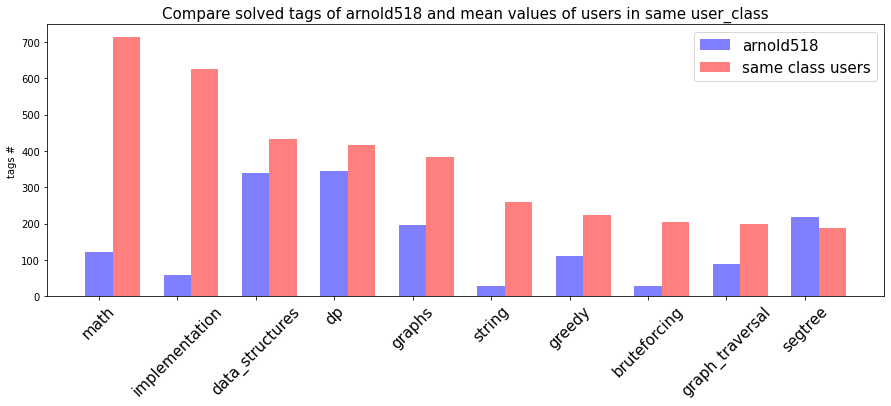

In [142]:
top10_user_10_tag = user_10_tag.head(10)

bar_width = 0.35
alpha = 0.5
index = np.arange(10)
label = top10_user_10_tag.tag

plt.figure(figsize=(15,5))
p1 = plt.bar(index, top10_user_10_tag.user, bar_width, 
             color='b', alpha=alpha,label=user_name)

p2 = plt.bar(index + bar_width, top10_user_10_tag.num, bar_width, 
            color='r', alpha=alpha,label='mean_users')

plt.title('Compare solved tags of '+user_name+' and mean values of users in same user_class', fontsize=15)
plt.ylabel('tags #', fontsize=10)
#plt.xlabel('tags', fontsize=18)
plt.xticks(index, label, fontsize=15, rotation=45)
plt.legend((p1[0], p2[0]), (user_name, 'same class users'), fontsize=15)
plt.show()

arnold518ÏùÄ Í∞ôÏùÄ ÌÅ¥ÎûòÏä§ ÎÇ¥ Ïú†Ï†ÄÎì§Ïóê ÎπÑÌï¥ implementation, string, bruteforcingÏù¥ ÌòÑÏ†ÄÌûà Ï†ÅÏùåÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.
  
ÎÇòÏ§ëÏóê Í∞ôÏùÄ Class ÎÇ¥ Îã§Î•∏ Ïú†Ï†ÄÎì§Ïùò ÌíÄÏù¥ Ïù¥Î†•Í≥º ÎπÑÍµêÌïòÏó¨ Ïú†Ï†ÄÍ∞Ä ÎßéÏù¥ ÌíÄÏßÄ ÏïäÏùÄ tag Î¨∏Ï†ú ÏúÑÏ£ºÎ°ú Ï∂îÏ≤úÌïòÎäî Î∞©Î≤ïÏùÑ Îñ†Ïò¨Î†§Î≥º Ïàò ÏûàÍ≤†ÎÑ§Ïöî. ü§î